In [1]:
import uproot
import hist
import awkward as ak
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
import numpy as np
import matplotlib.pyplot as plt
import mplhep as hep
import warnings
plt.style.use(hep.style.CMS)

NanoAODSchema.warn_missing_crossrefs = False
cmap_petroff = ["#3f90da", "#ffa90e", "#bd1f01", "#94a4a2", "#832db6", "#a96b59", "#e76300", "#b9ac70", "#717581", "#92dadd"]
plt.rcParams.update(
    {
        "xtick.labelsize": 18,
        "ytick.labelsize": 18,
        "legend.numpoints": 1,
        "axes.linewidth": 2,
        "legend.title_fontsize": 18,
        "axes.labelsize": 18,
        "legend.fontsize": 16,
        "axes.prop_cycle": plt.cycler(color=cmap_petroff),
    }
)

In [2]:
events = NanoEventsFactory.from_root(
    "nanogen_123.root",
    schemaclass=NanoAODSchema,
).events()


w = events.LHEWeight
eft_weight_names = [x for x in w.fields if x.startswith('rw')][1:]
chunks = [eft_weight_names[i:i + 9] for i in range(0, len(eft_weight_names), 9)]

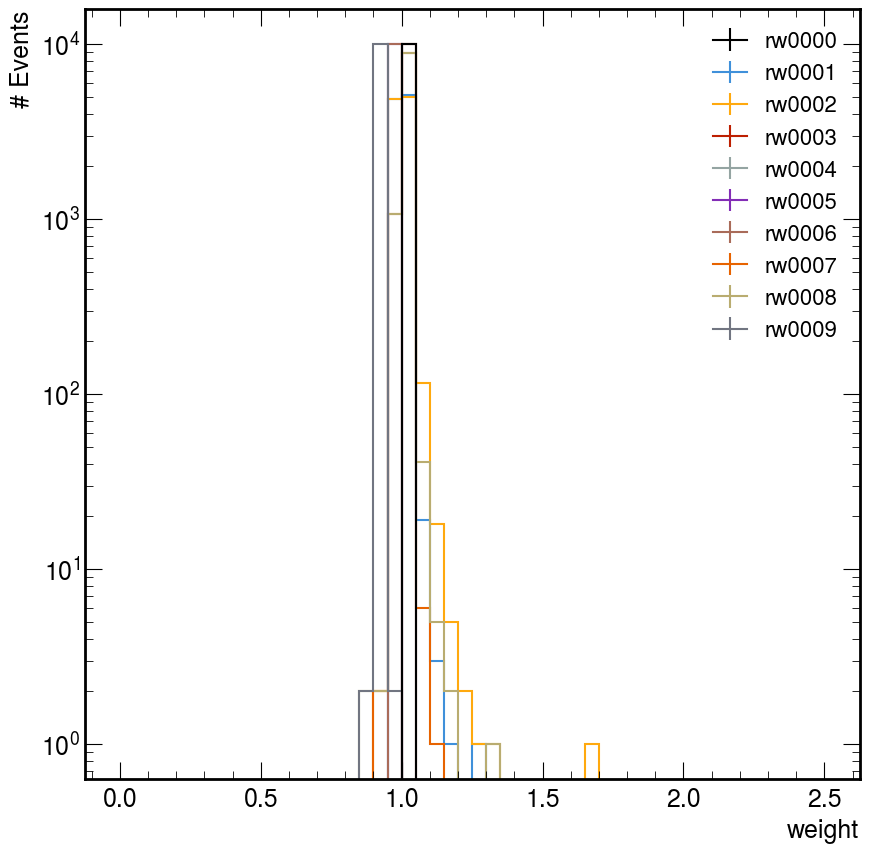

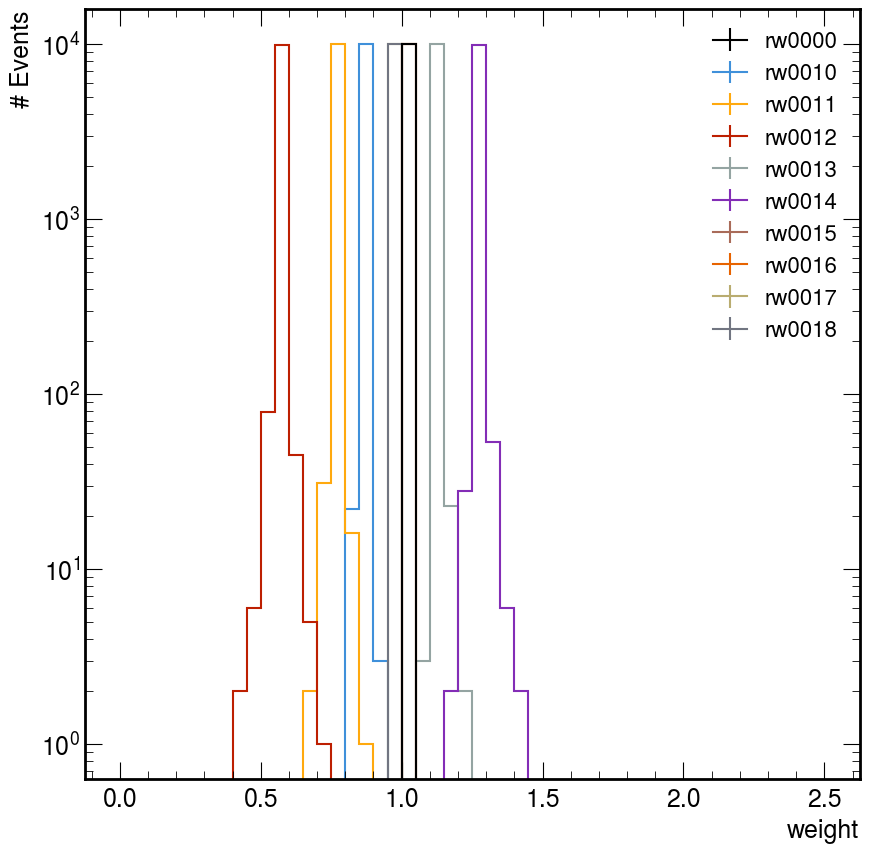

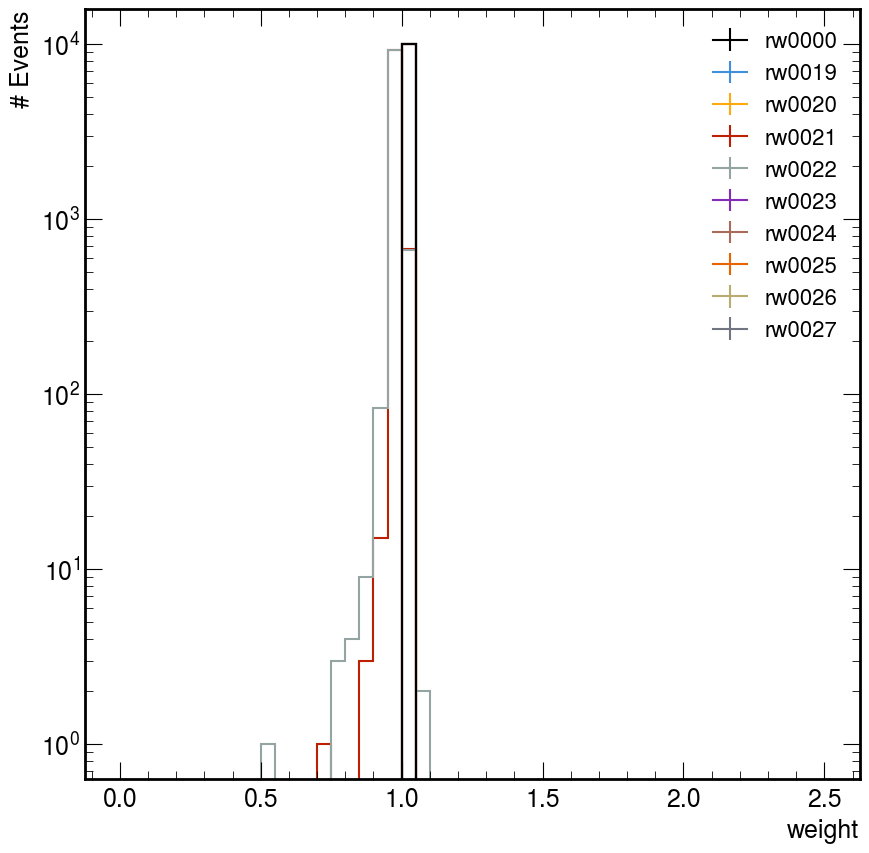

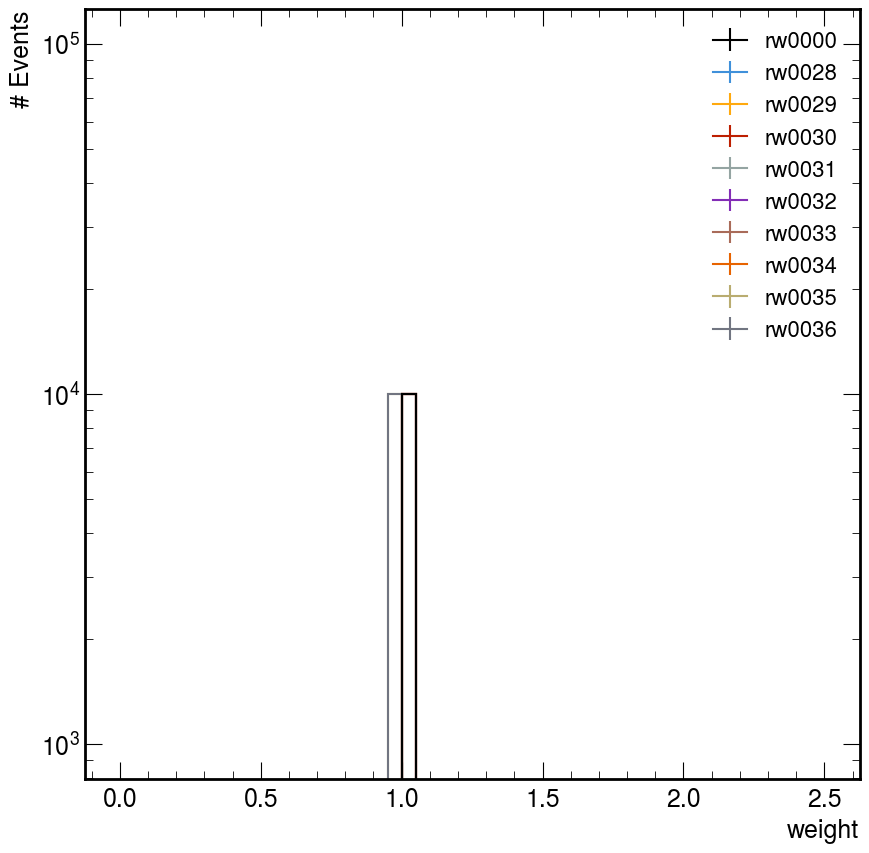

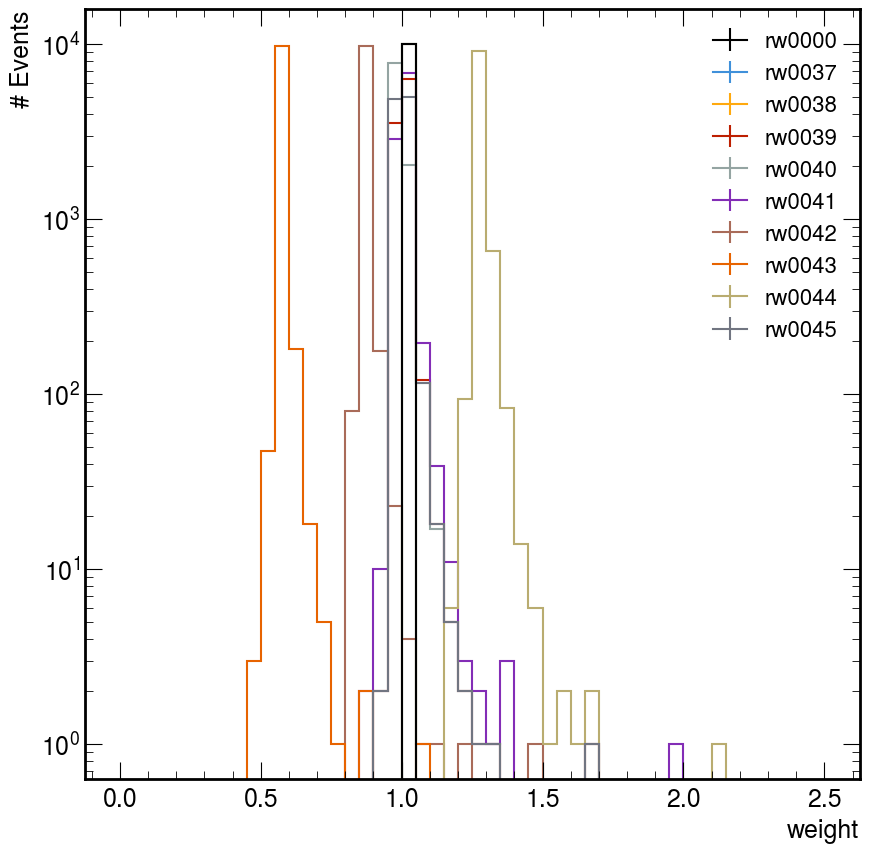

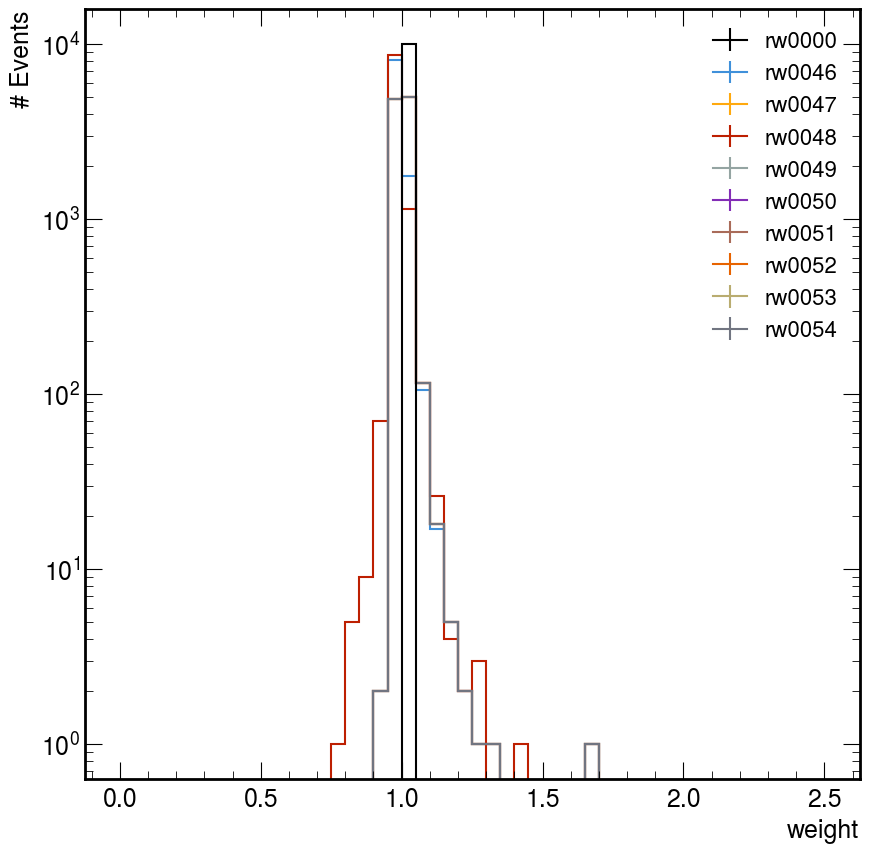

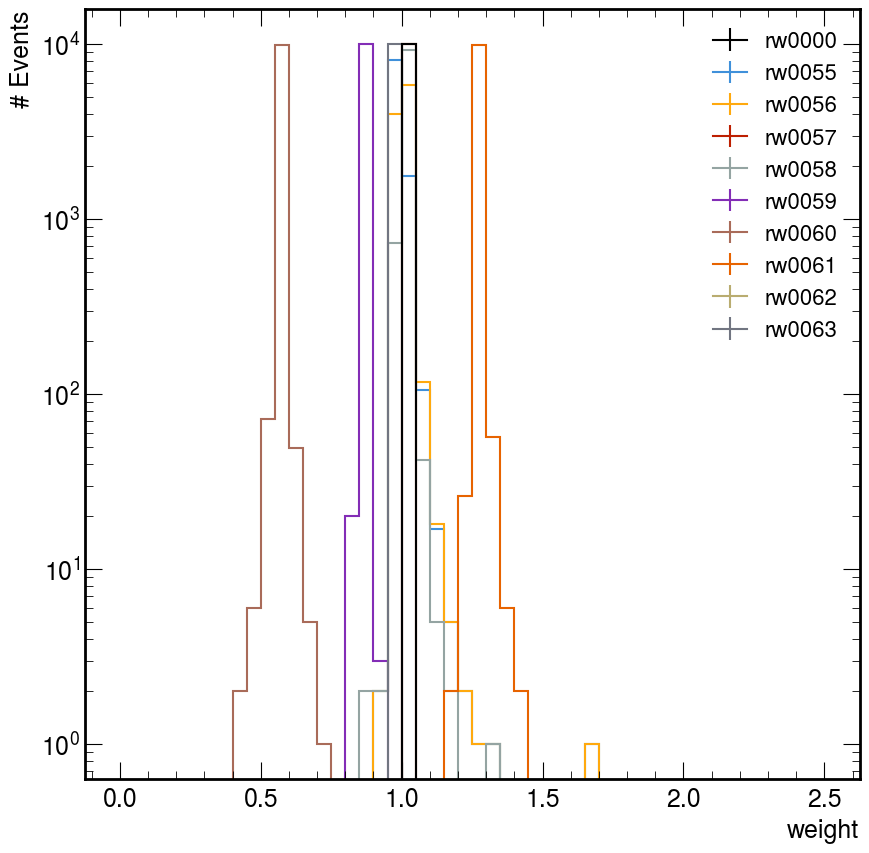

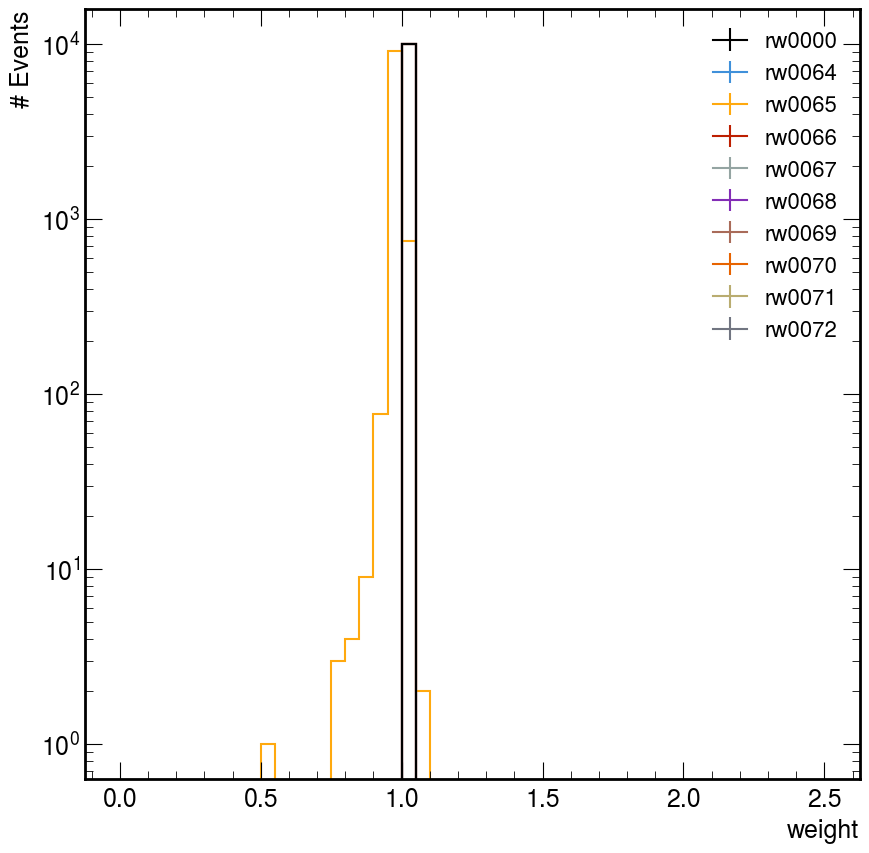

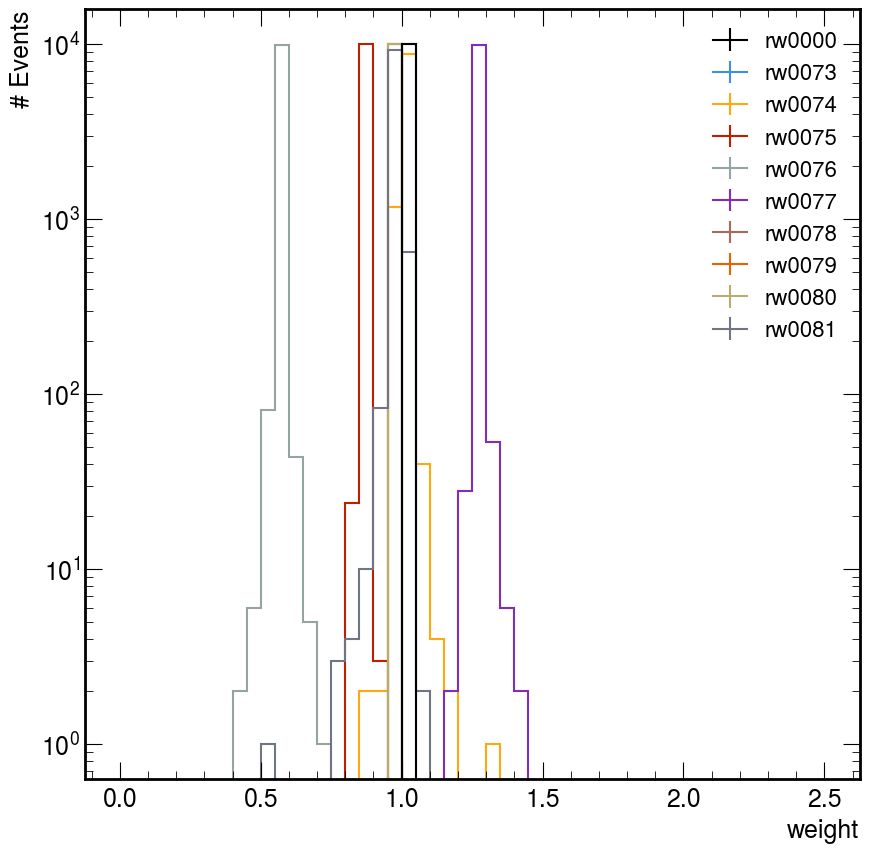

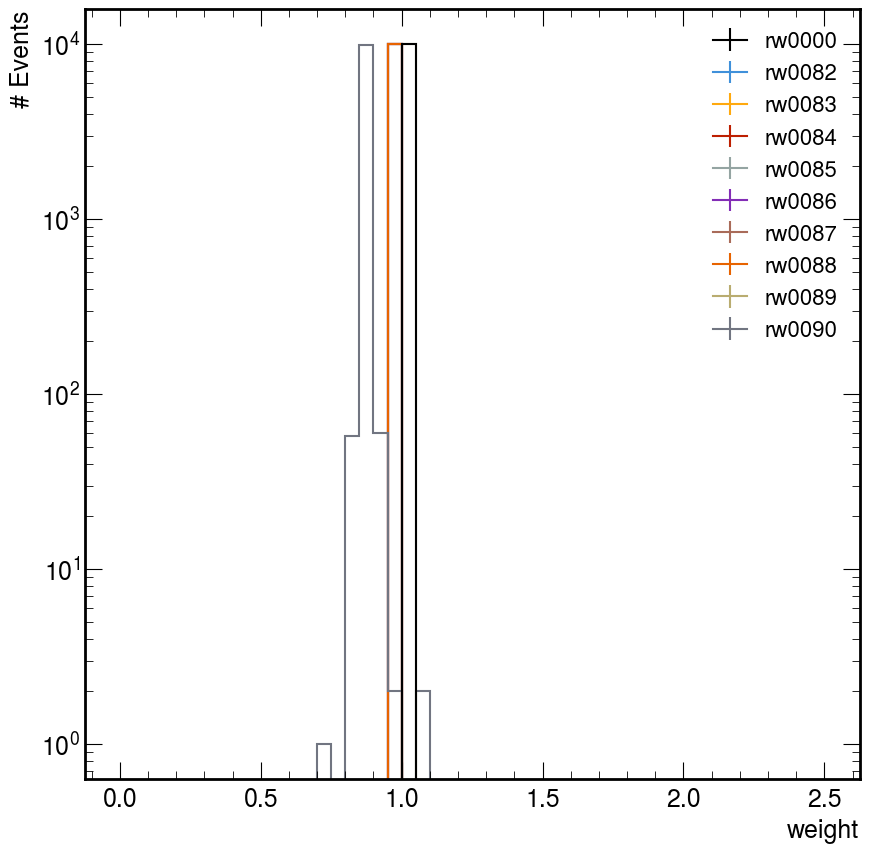

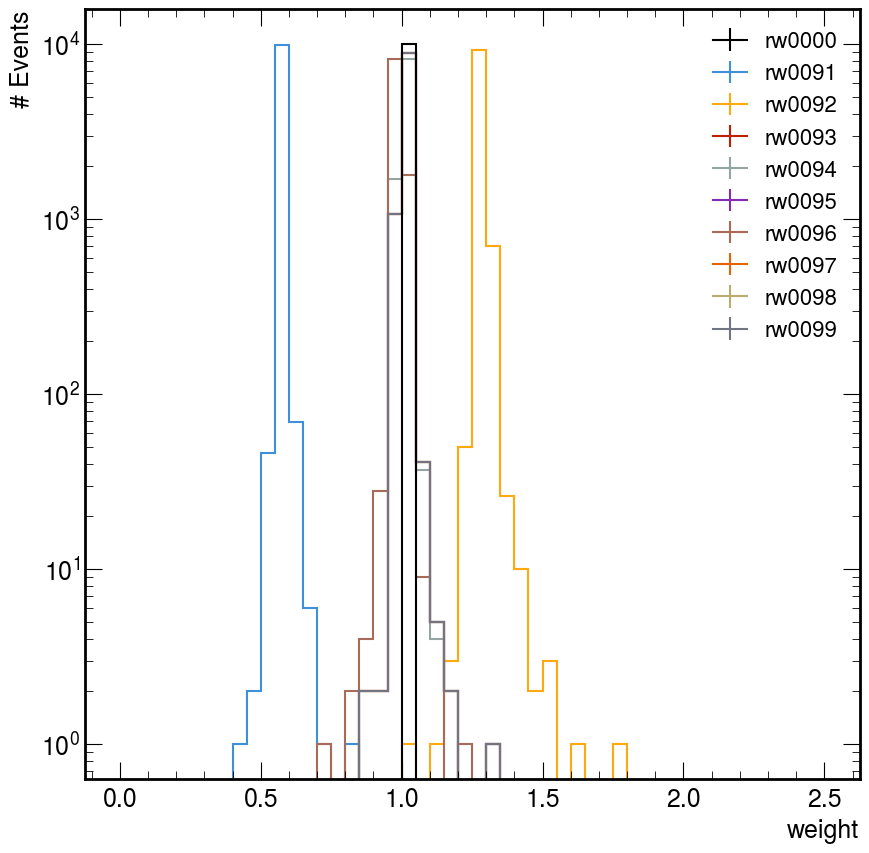

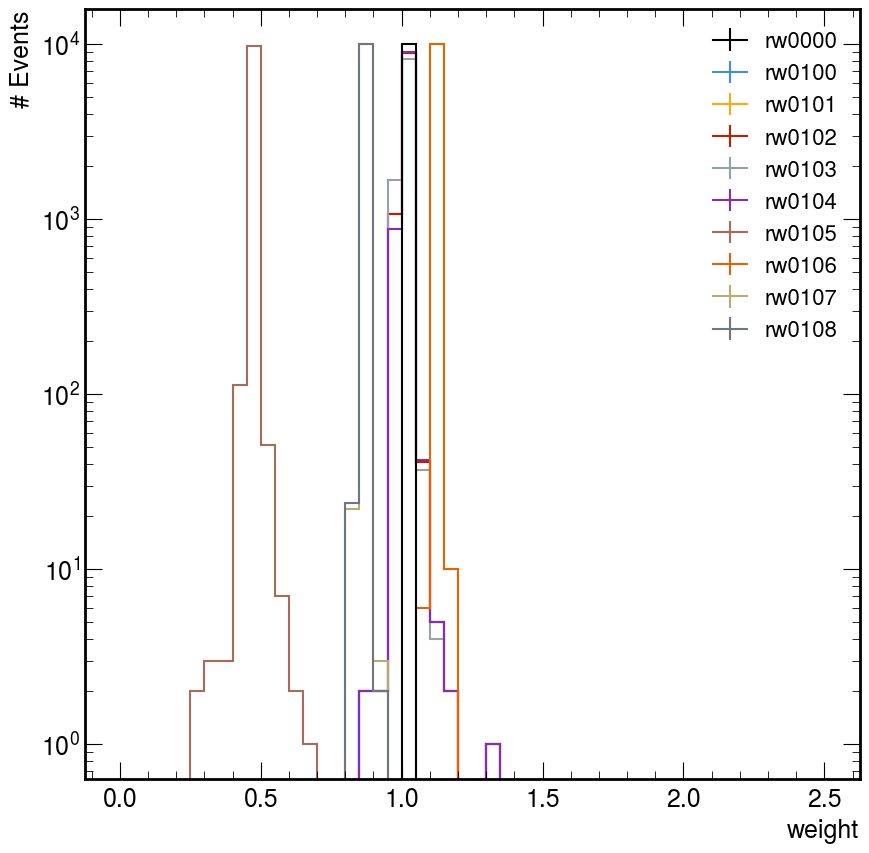

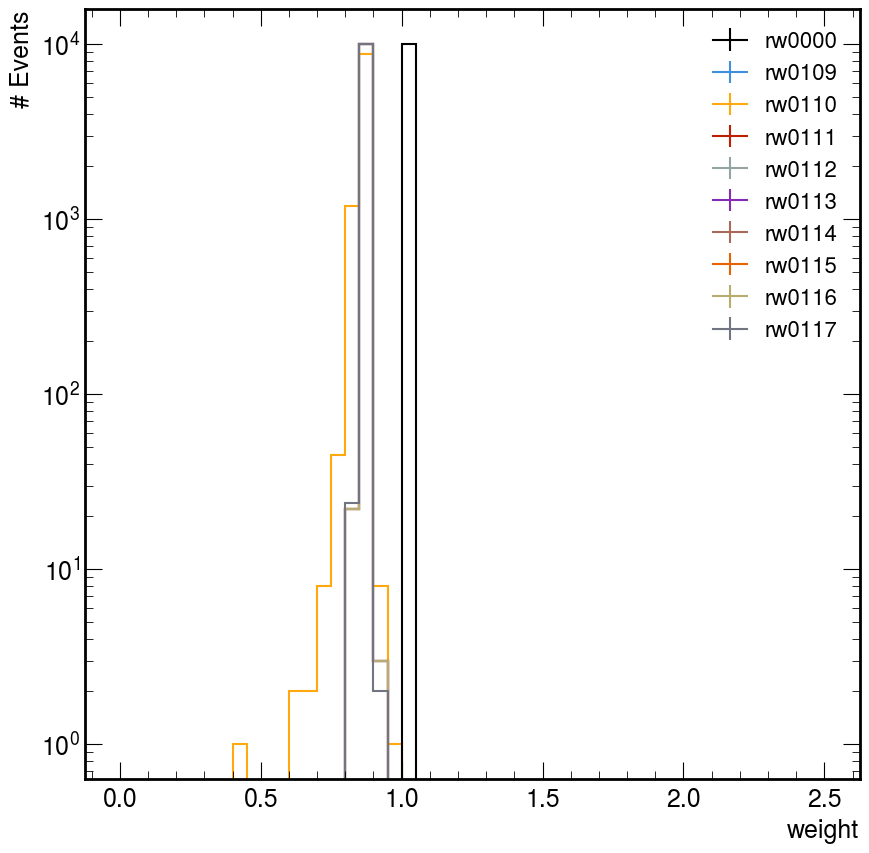

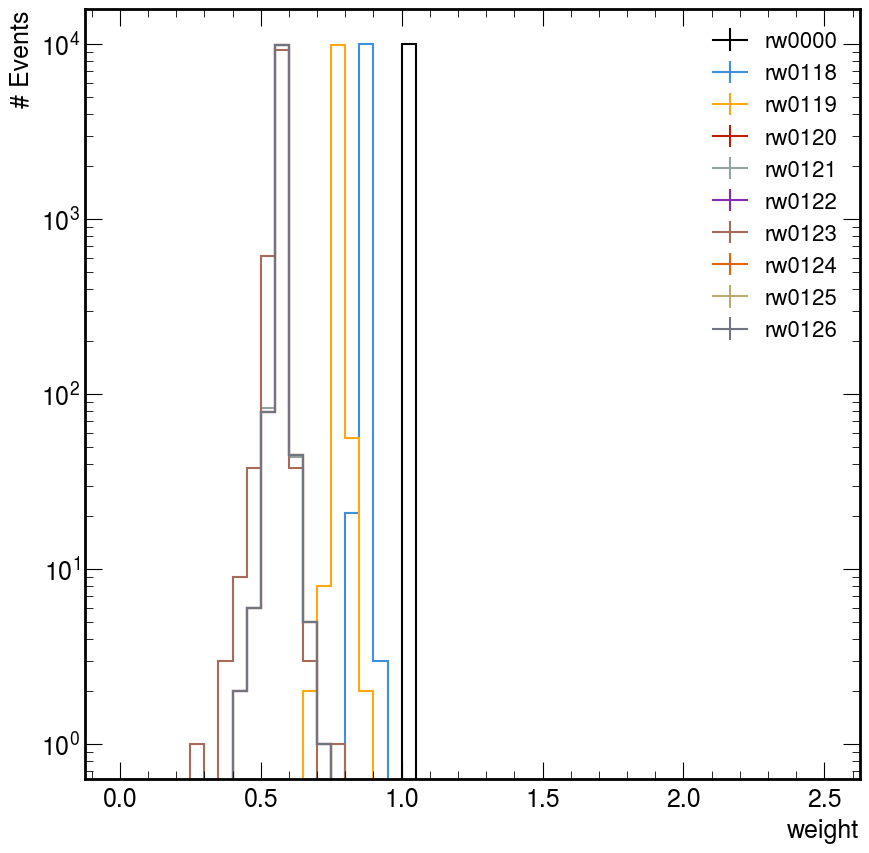

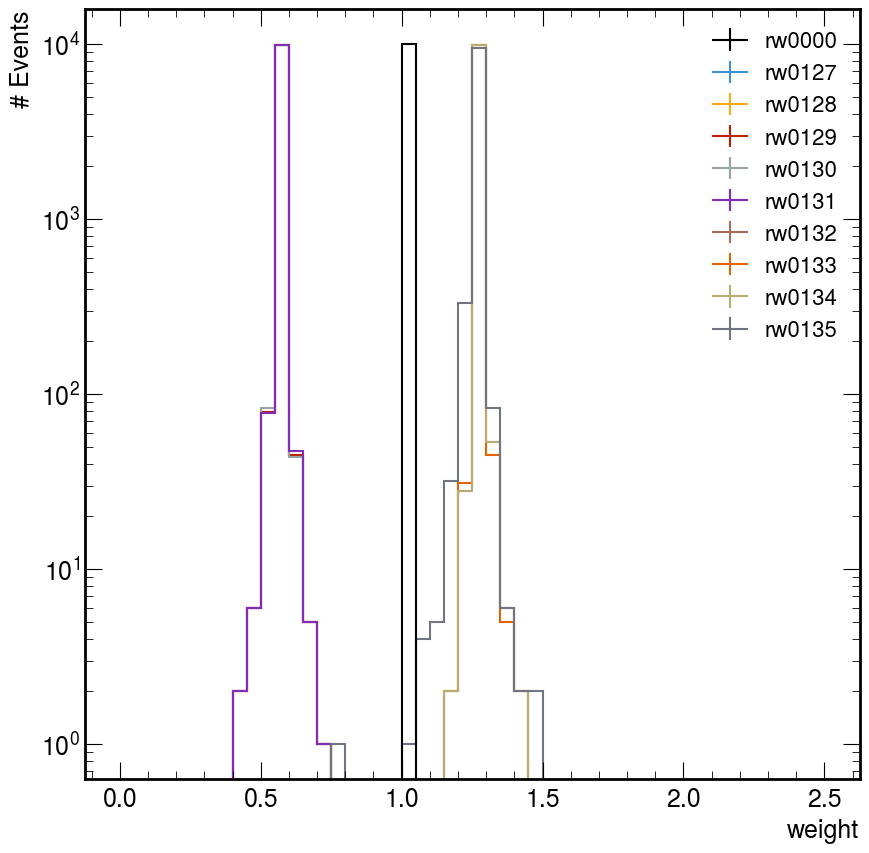

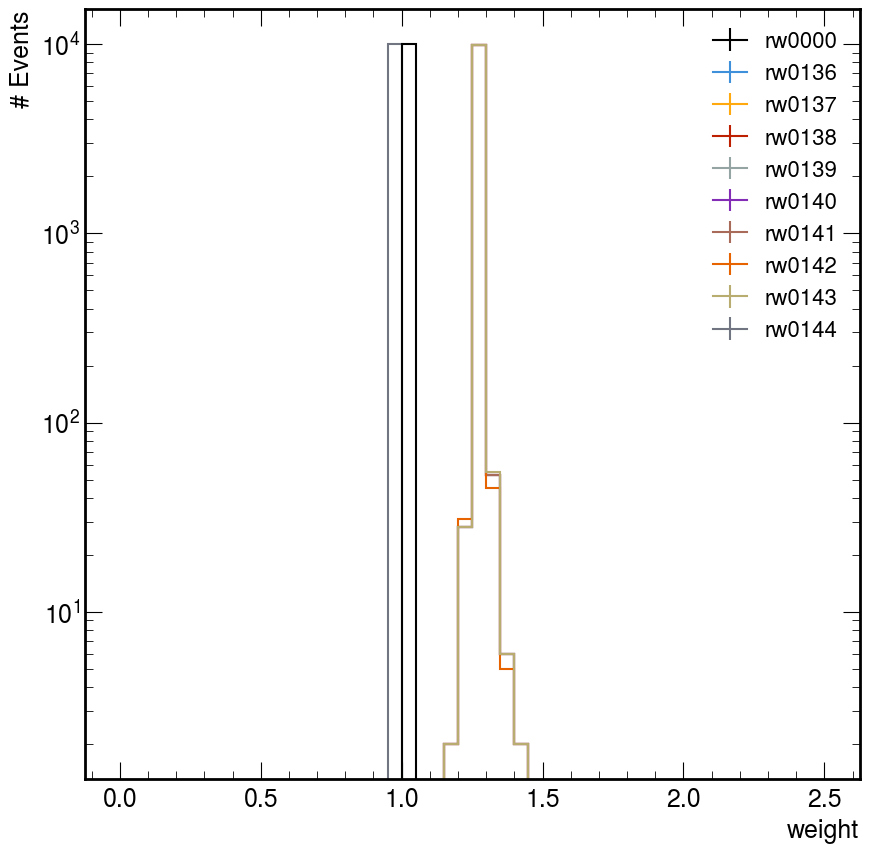

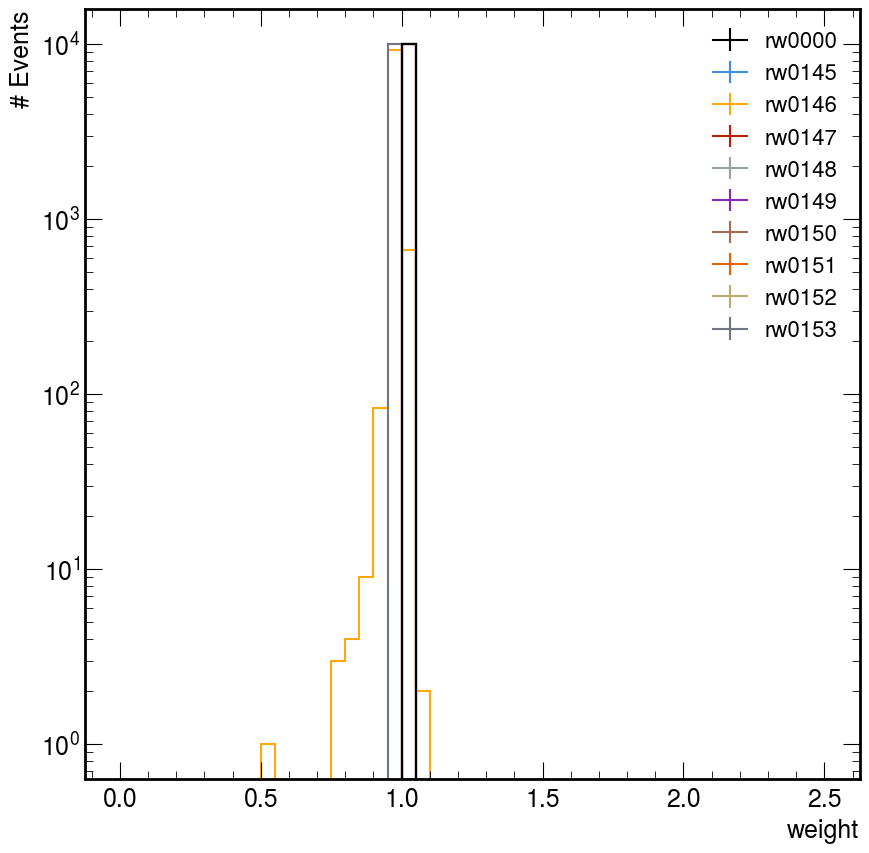

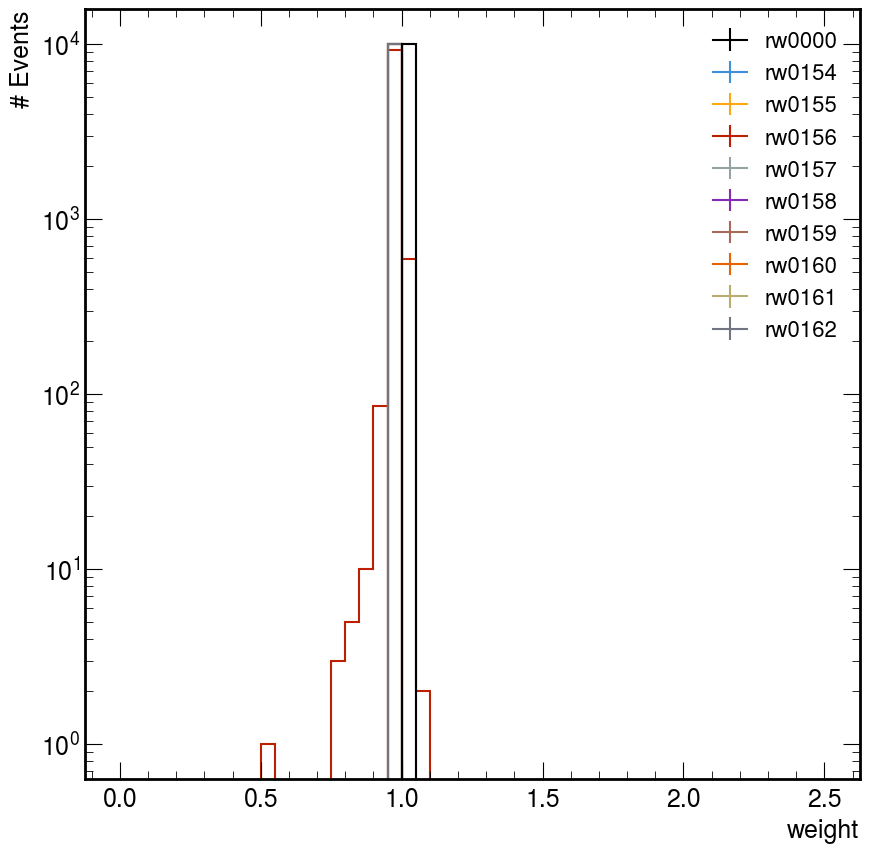

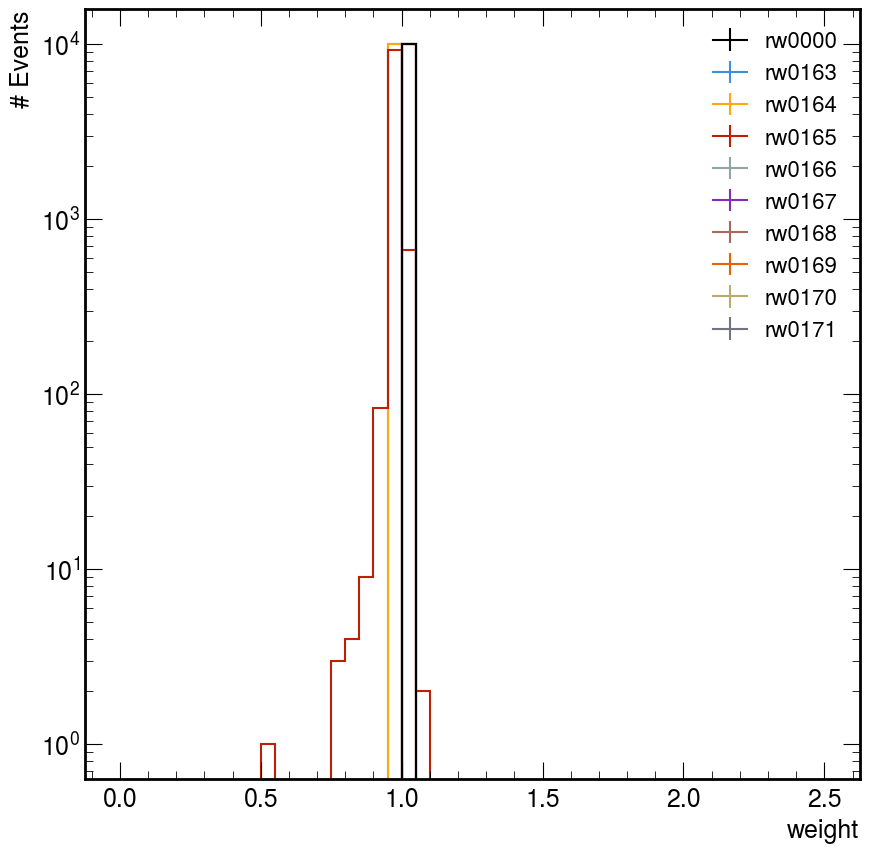

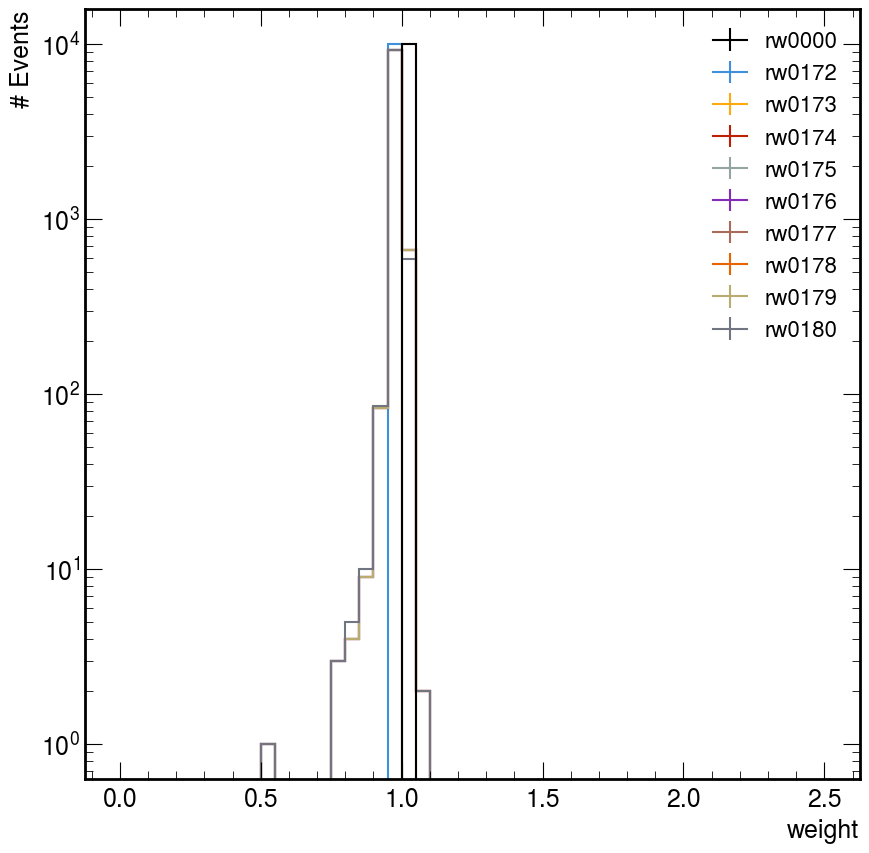

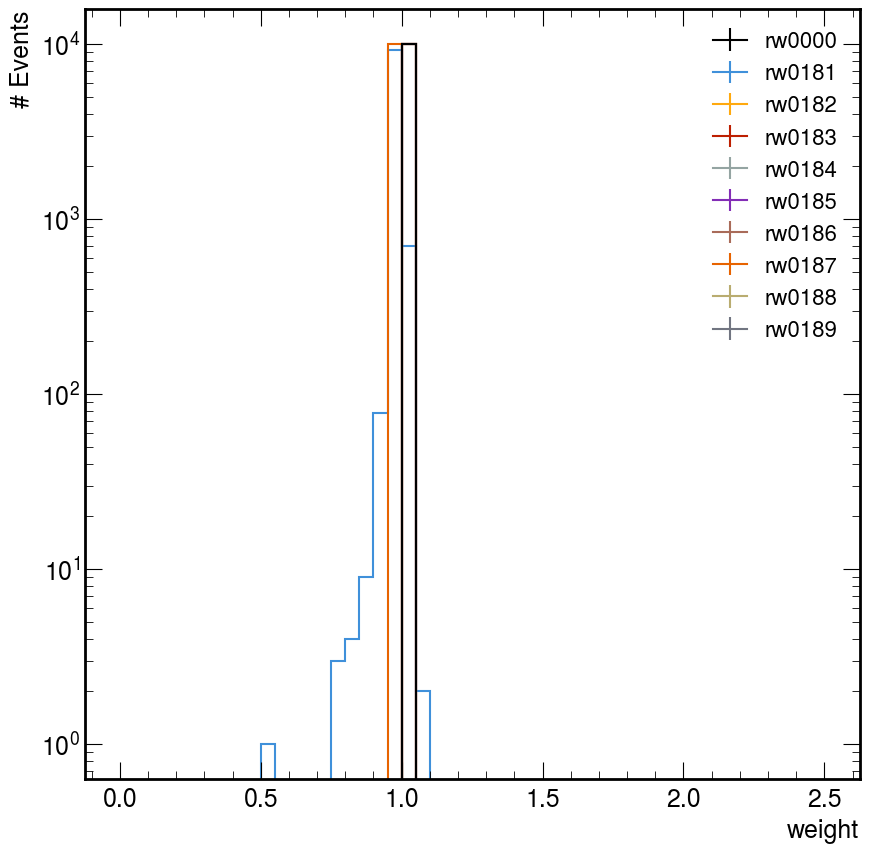

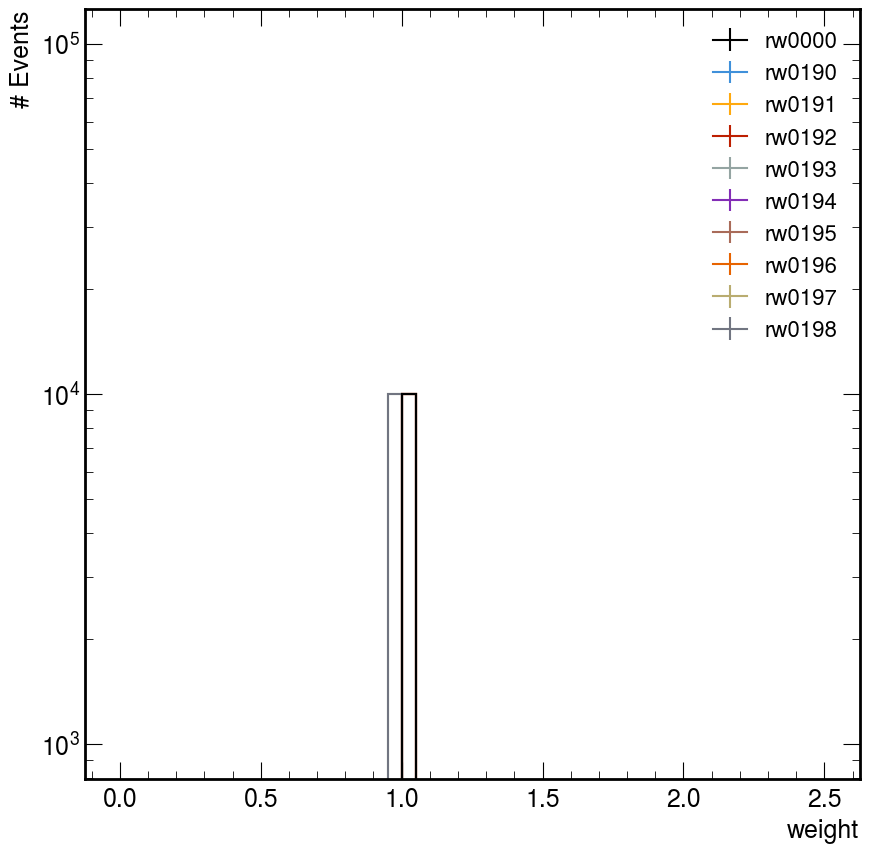

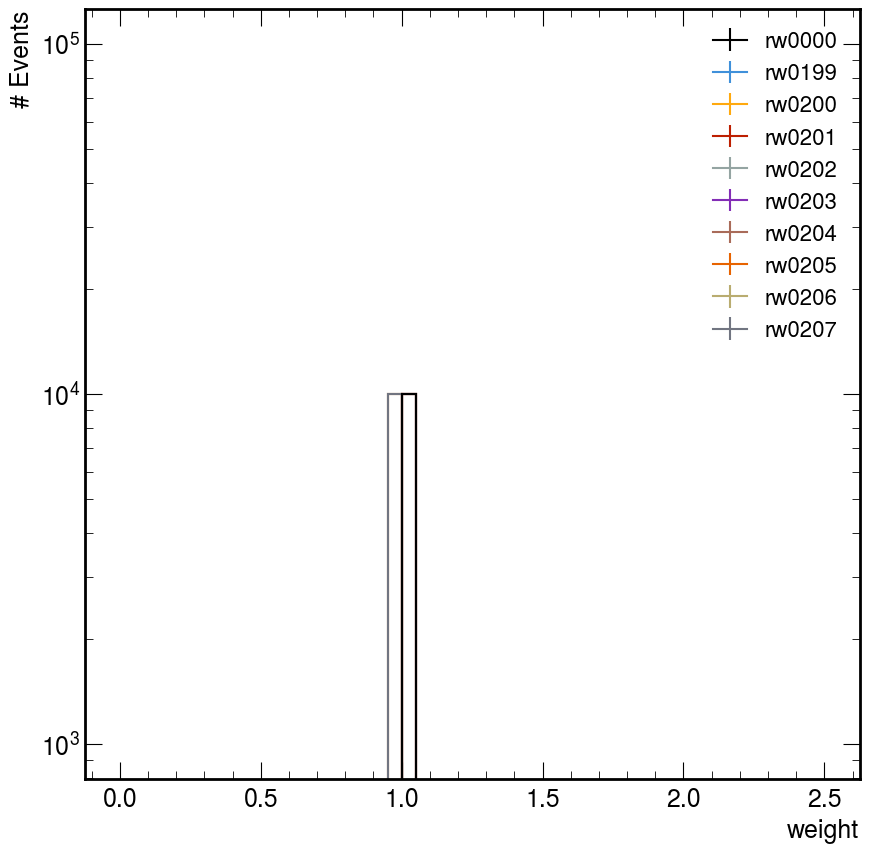

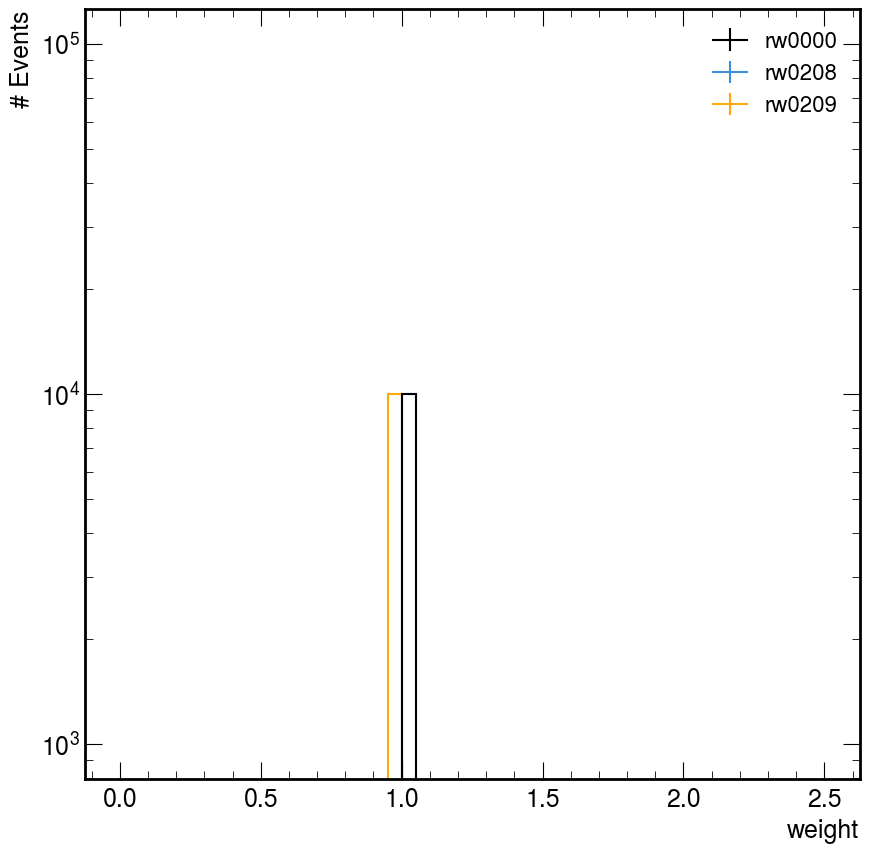

In [3]:
weight_axis = hist.axis.Regular(50, 0, 2.5, name="weight_ax", label="weight", underflow=True, overflow=True)

for i in chunks:
    fig, ax = plt.subplots()
    h = hist.Hist(weight_axis)
    h.fill(weight_ax=getattr(events.LHEWeight, "rw0000"))
    h.plot1d(ax=ax, yerr=0, label="rw0000", color="k", zorder=3)
    for j in i:
        h = hist.Hist(weight_axis)
        h.fill(weight_ax=getattr(events.LHEWeight, j))
        h.plot1d(ax=ax, yerr=0, label=j)

    ax.set_ylabel(r'# Events')
    ax.set_xlabel(r'weight')
    ax.set_yscale("log")
    ax.legend()
    plt.show()

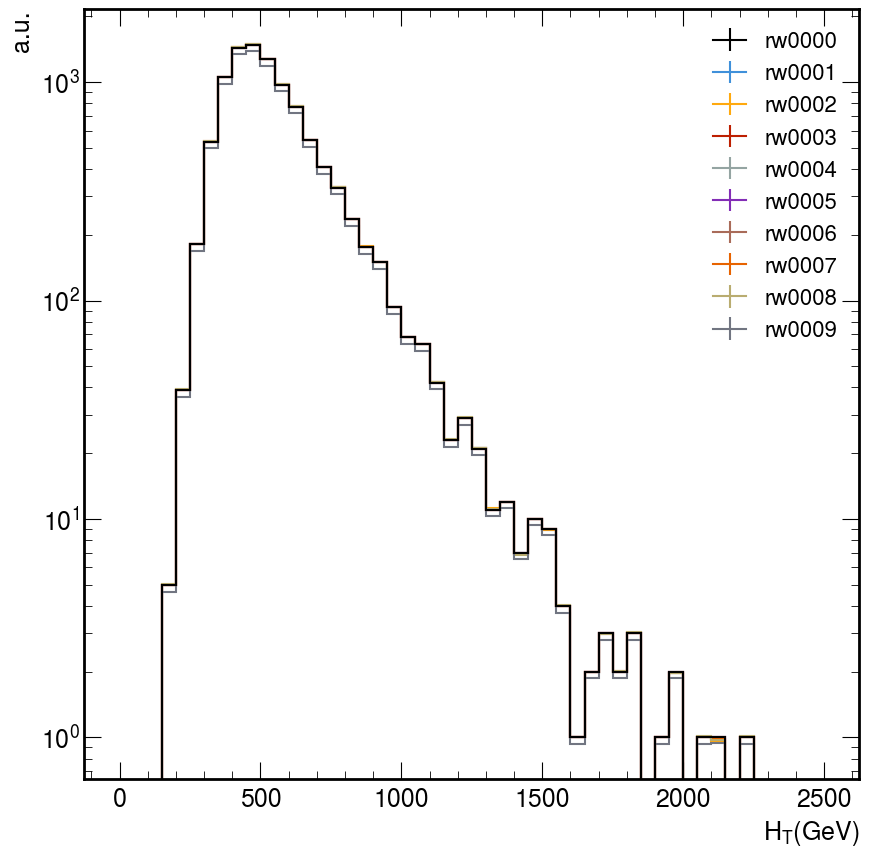

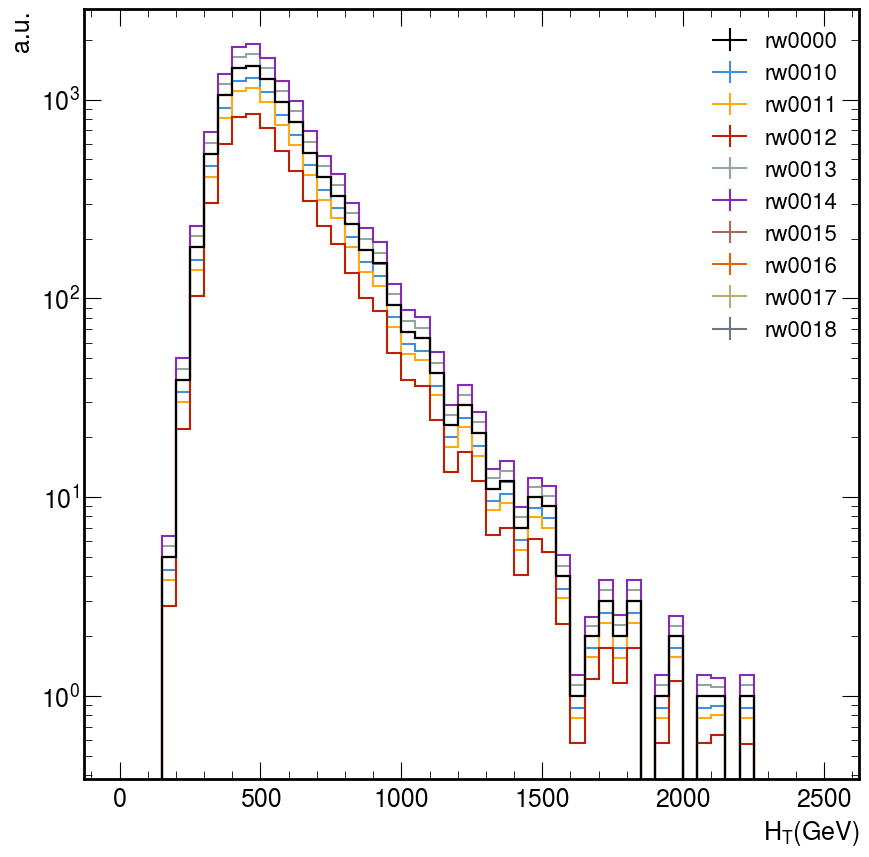

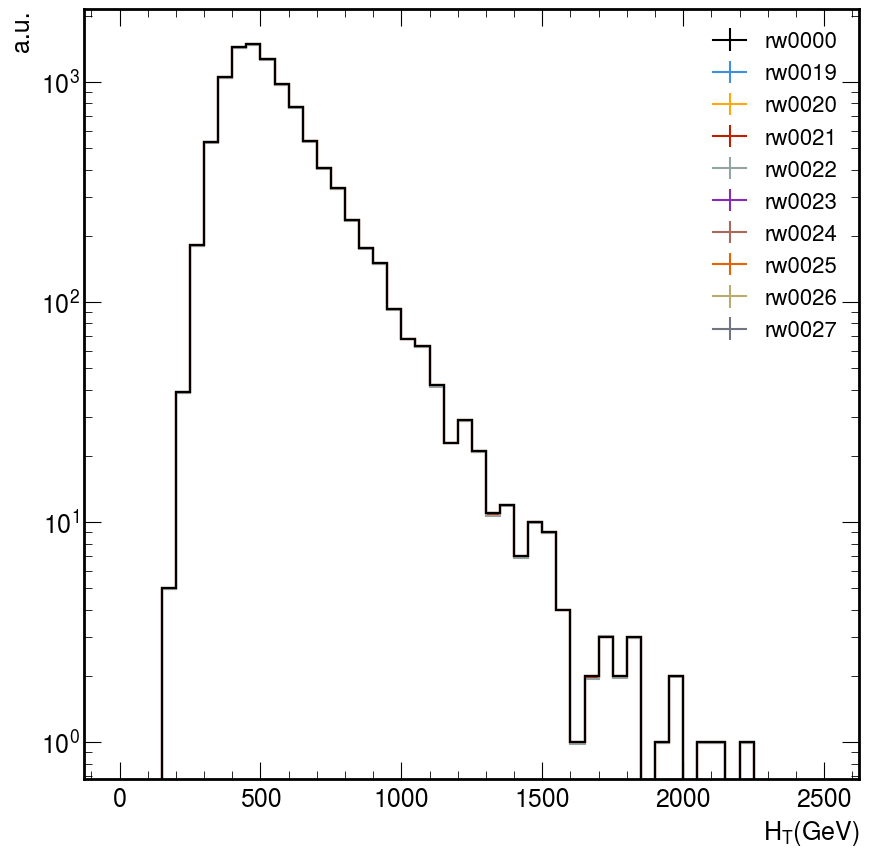

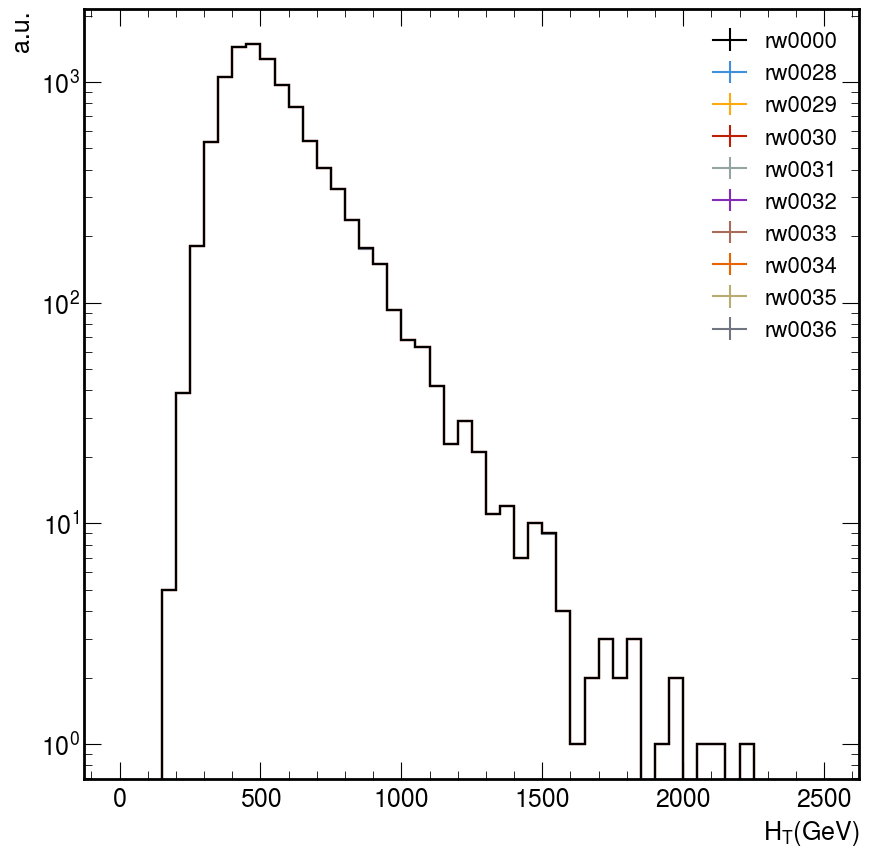

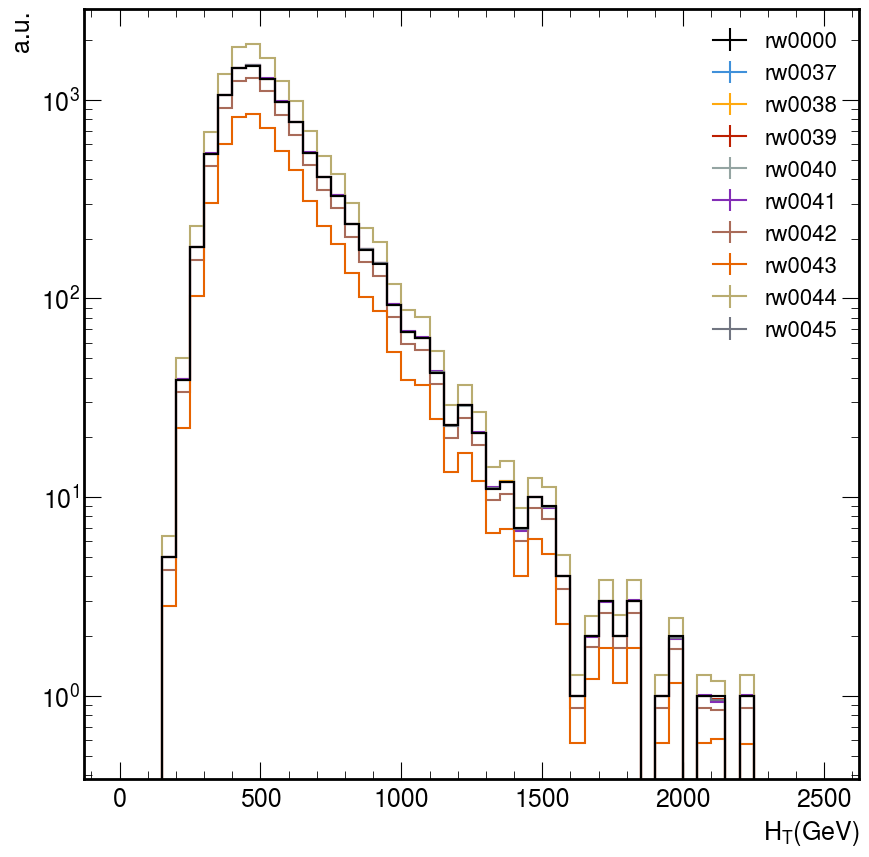

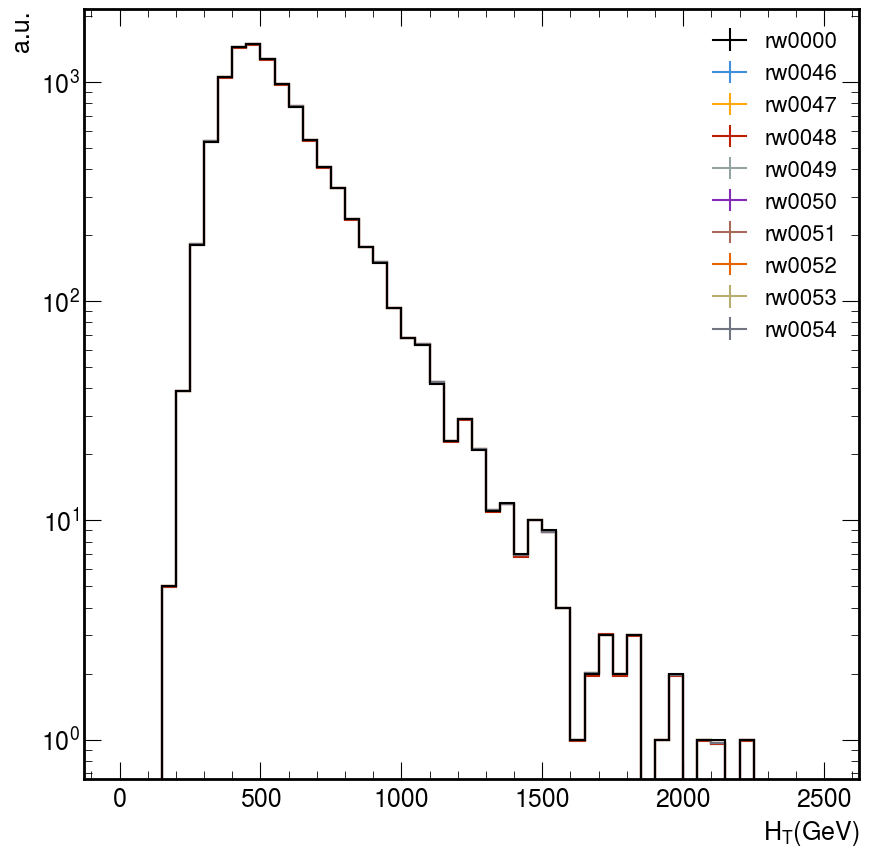

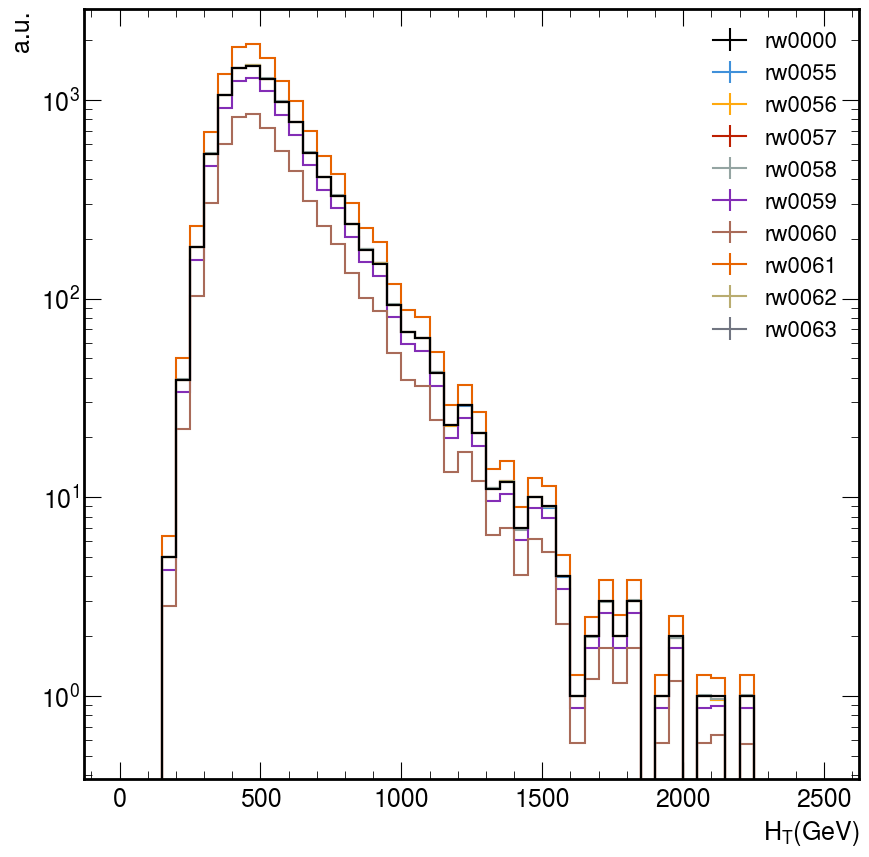

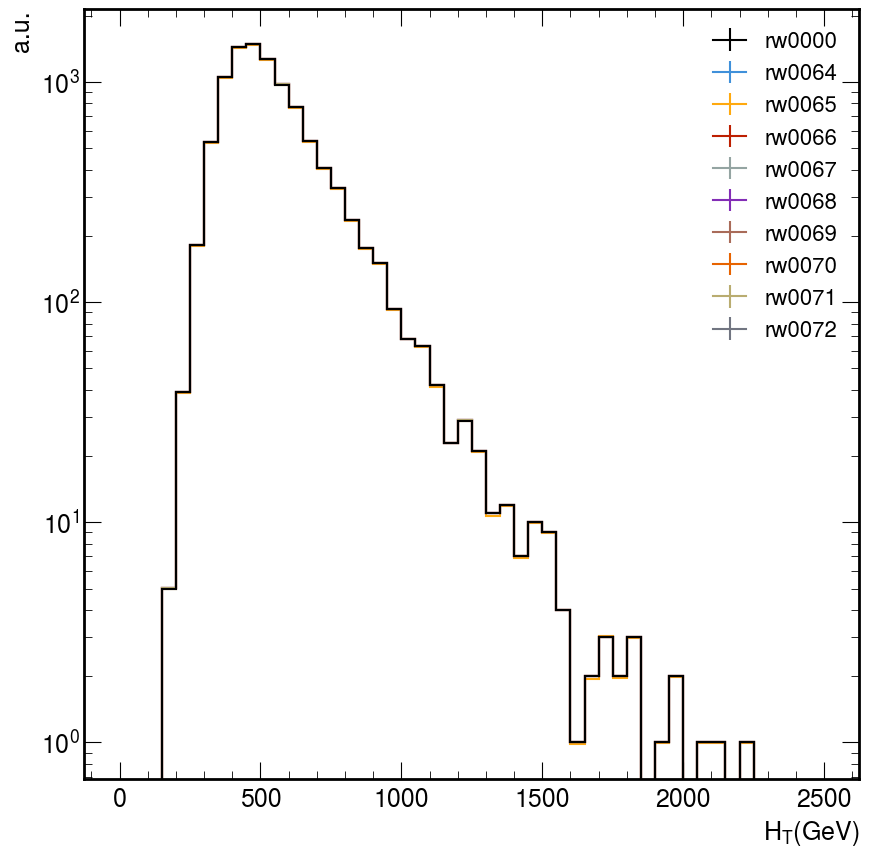

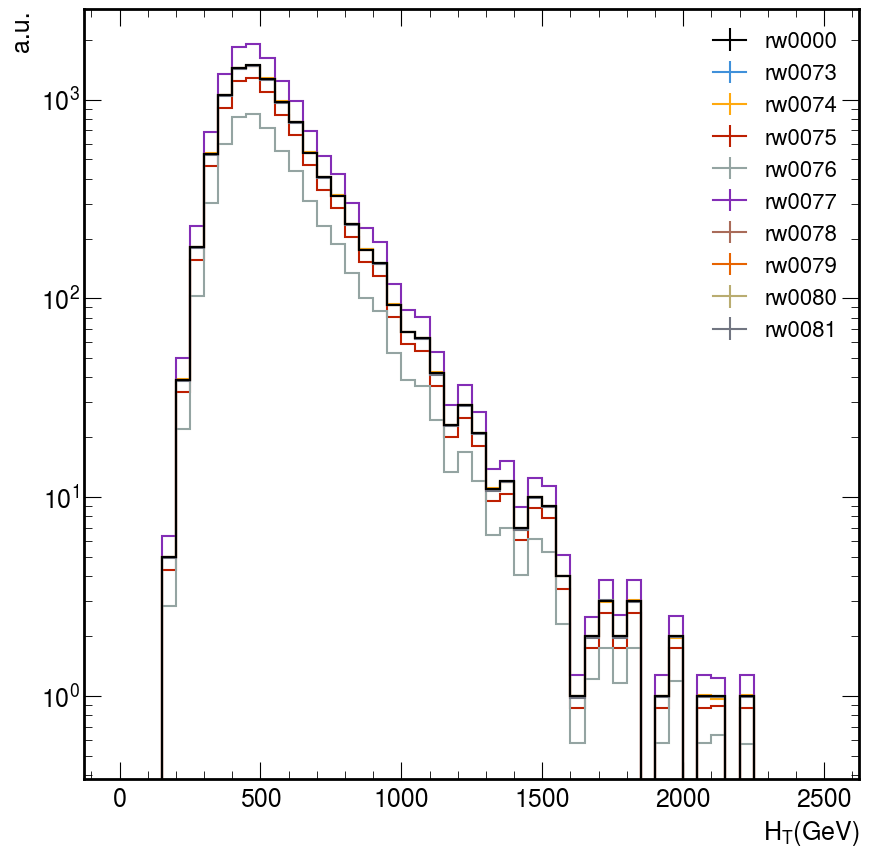

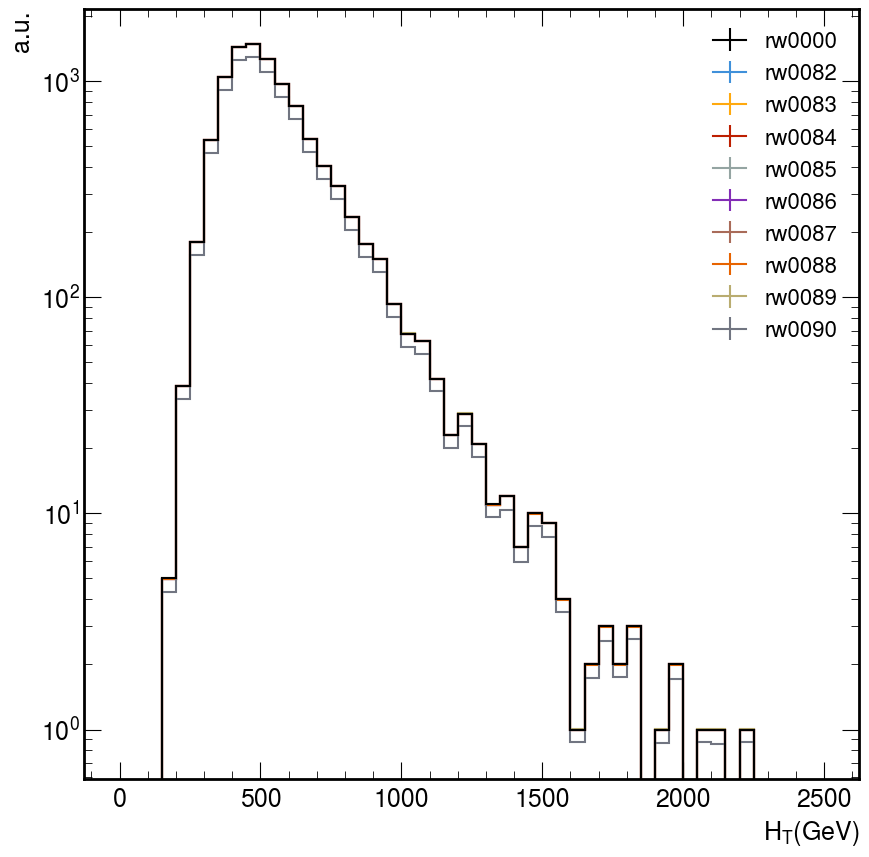

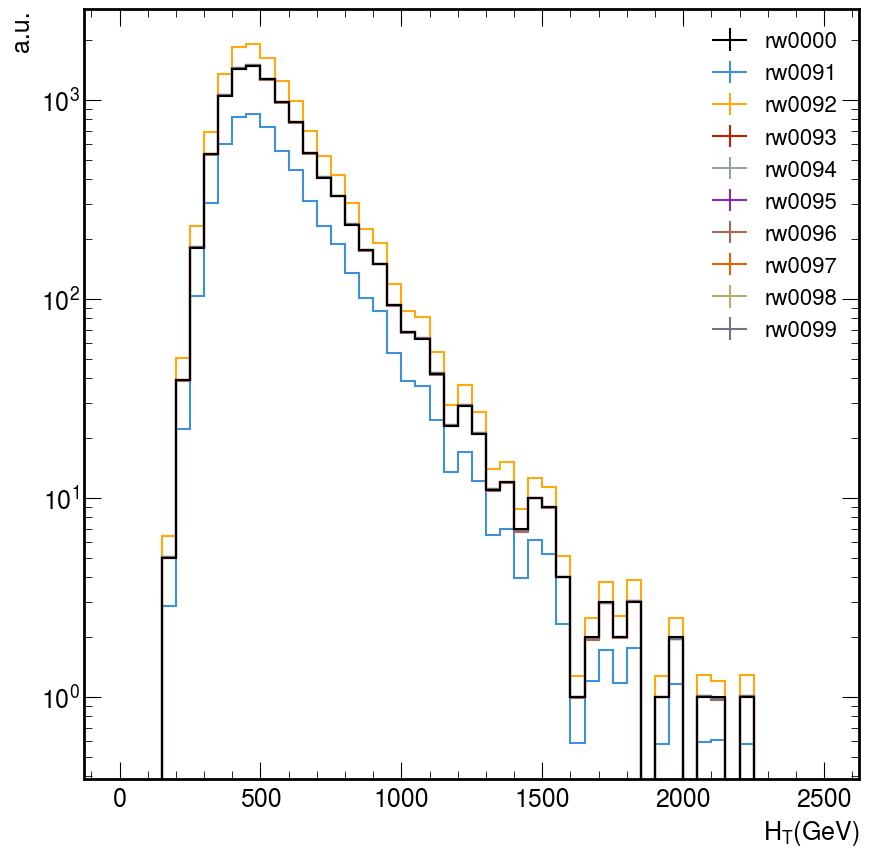

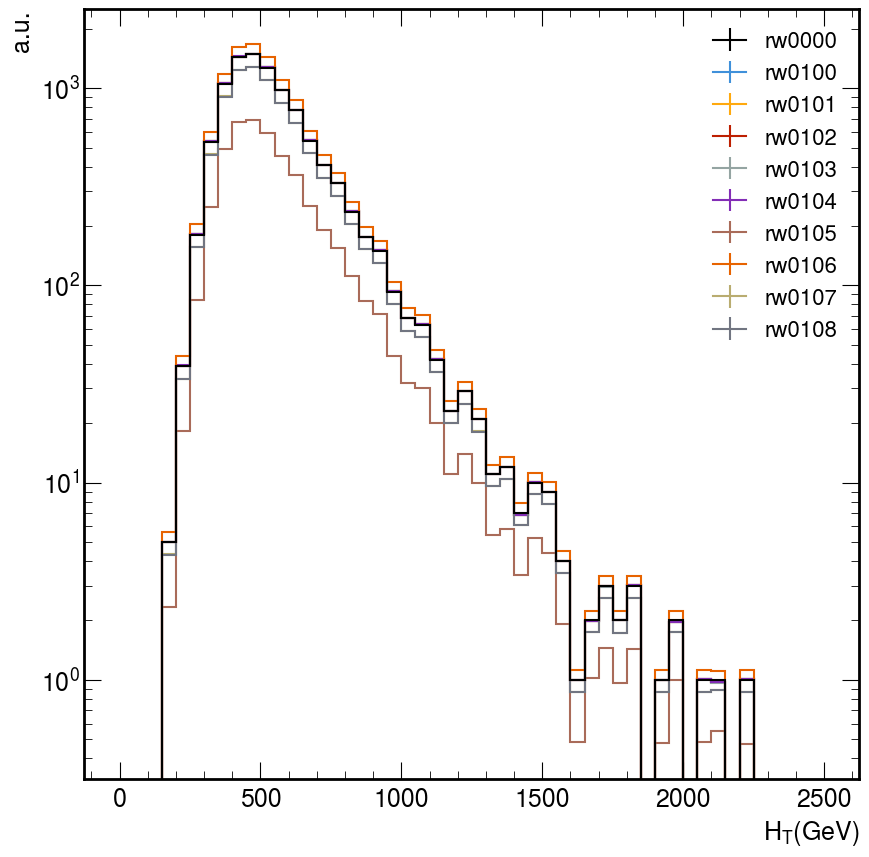

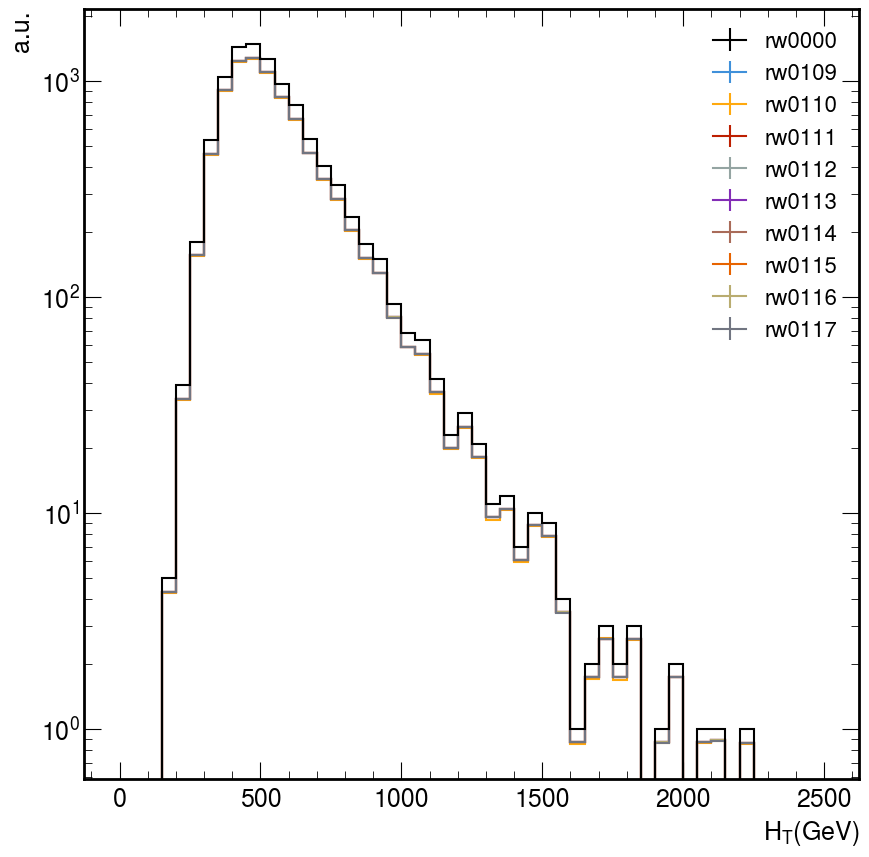

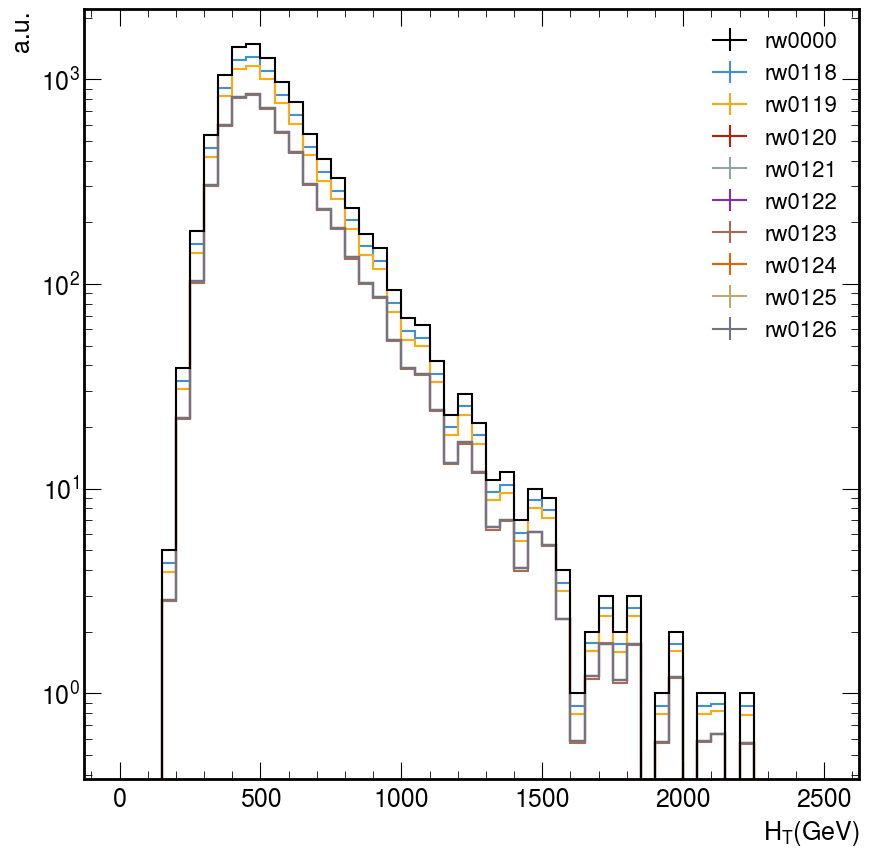

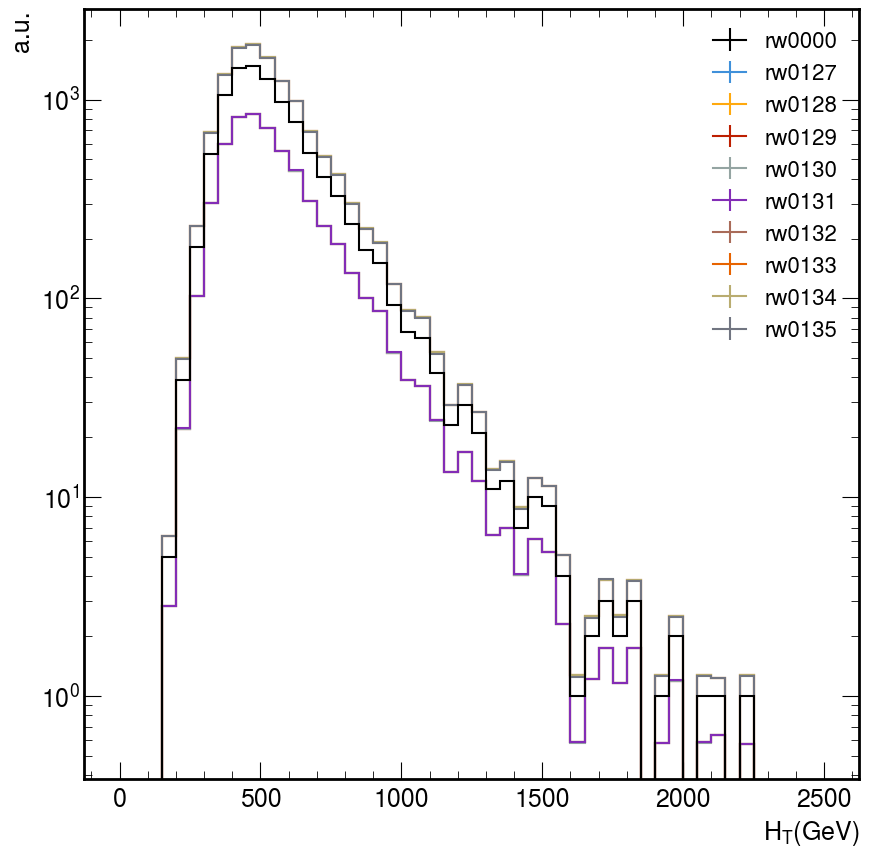

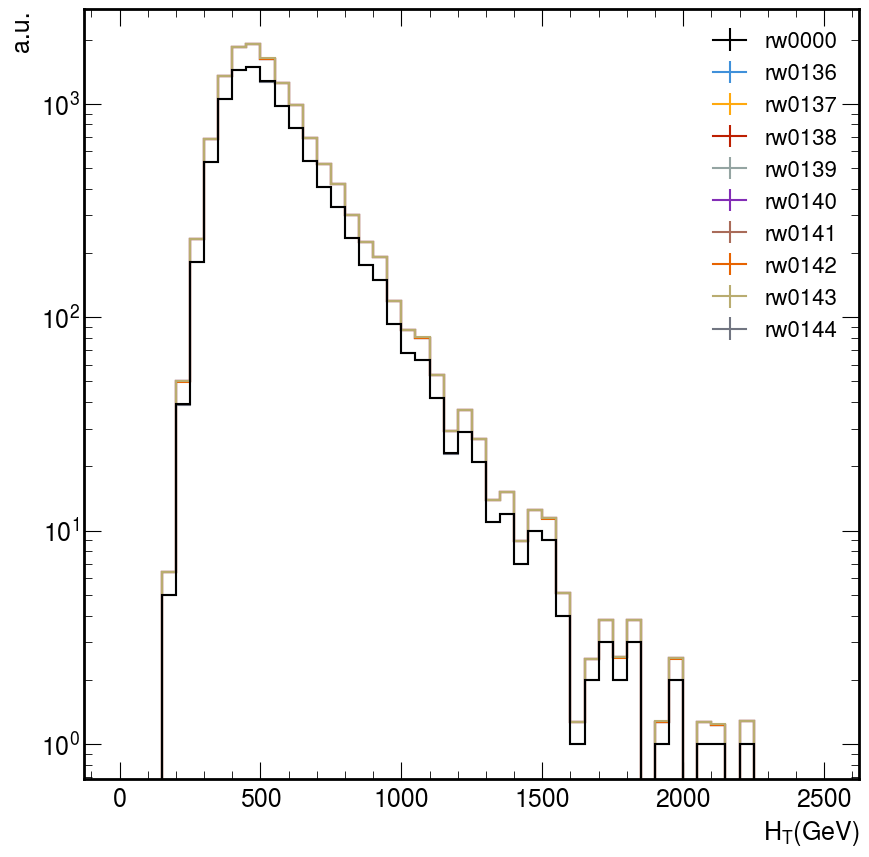

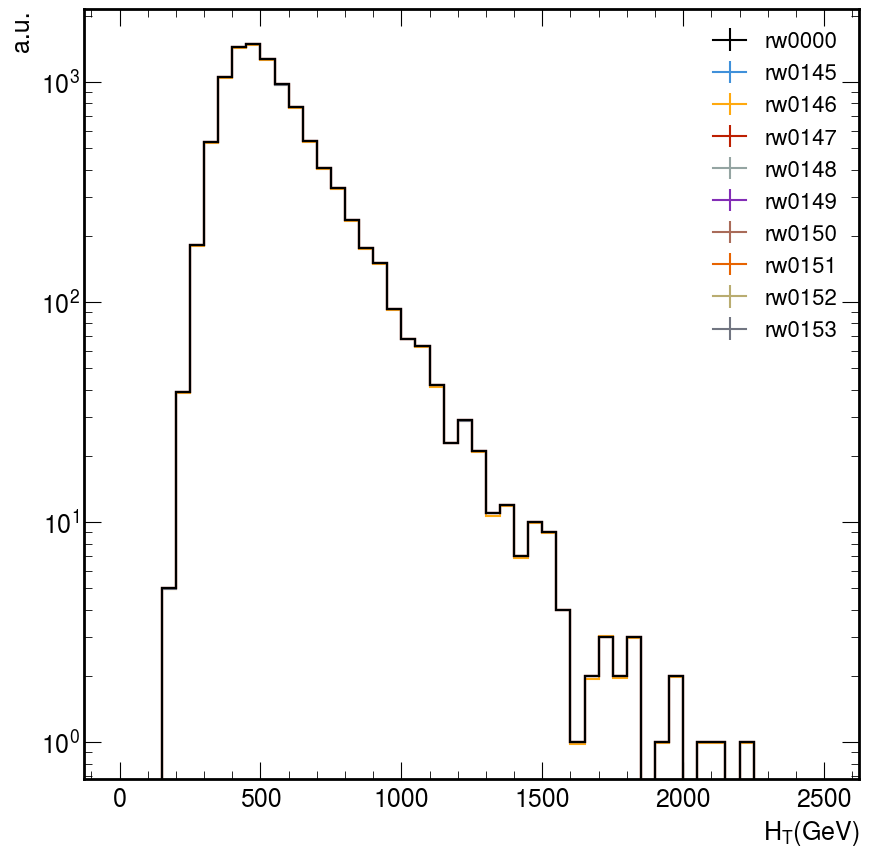

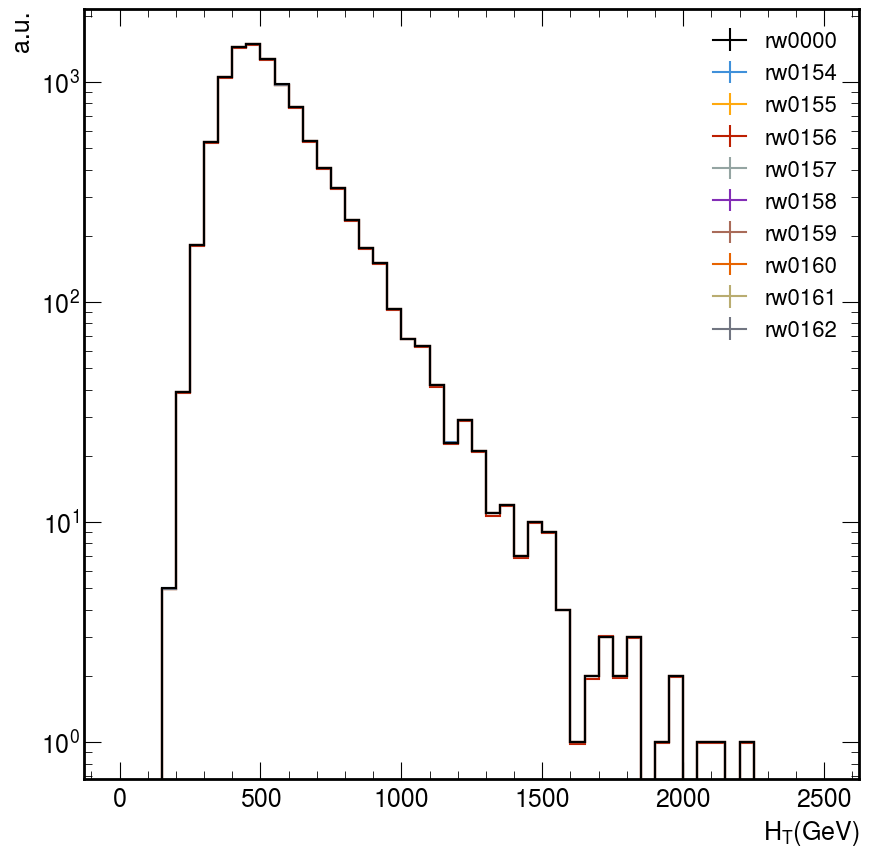

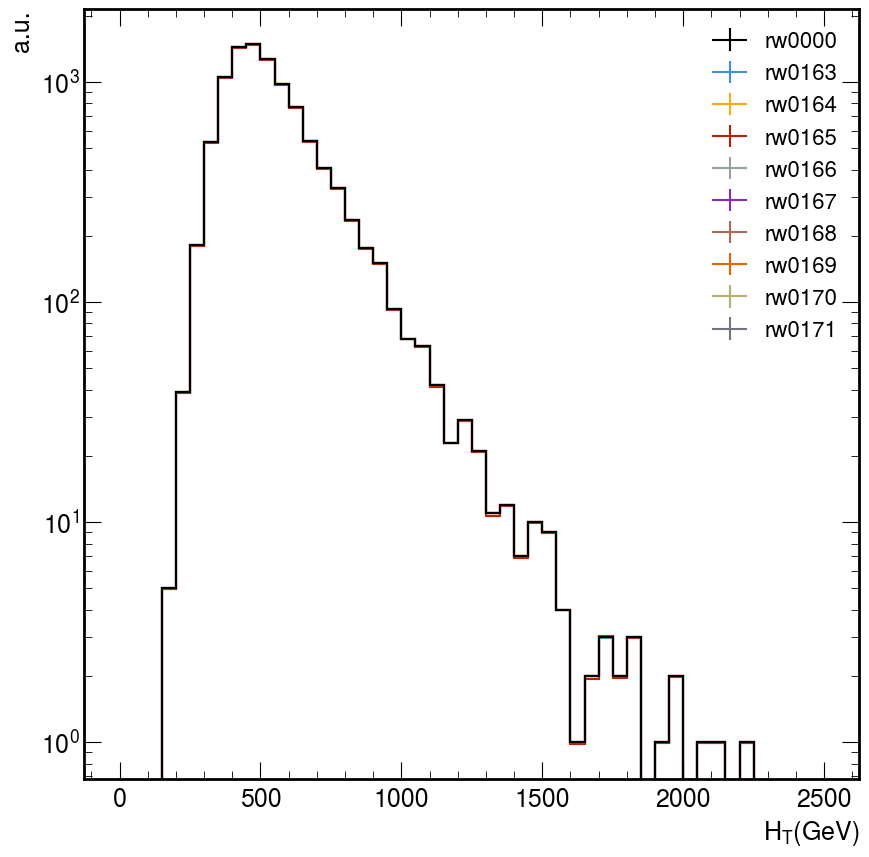

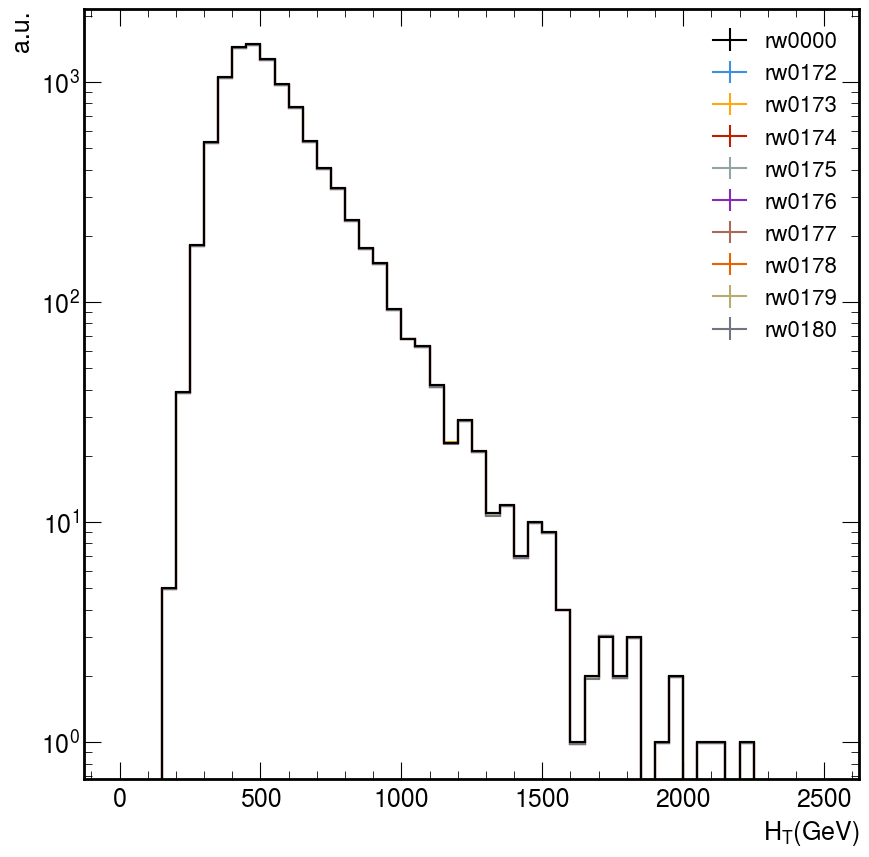

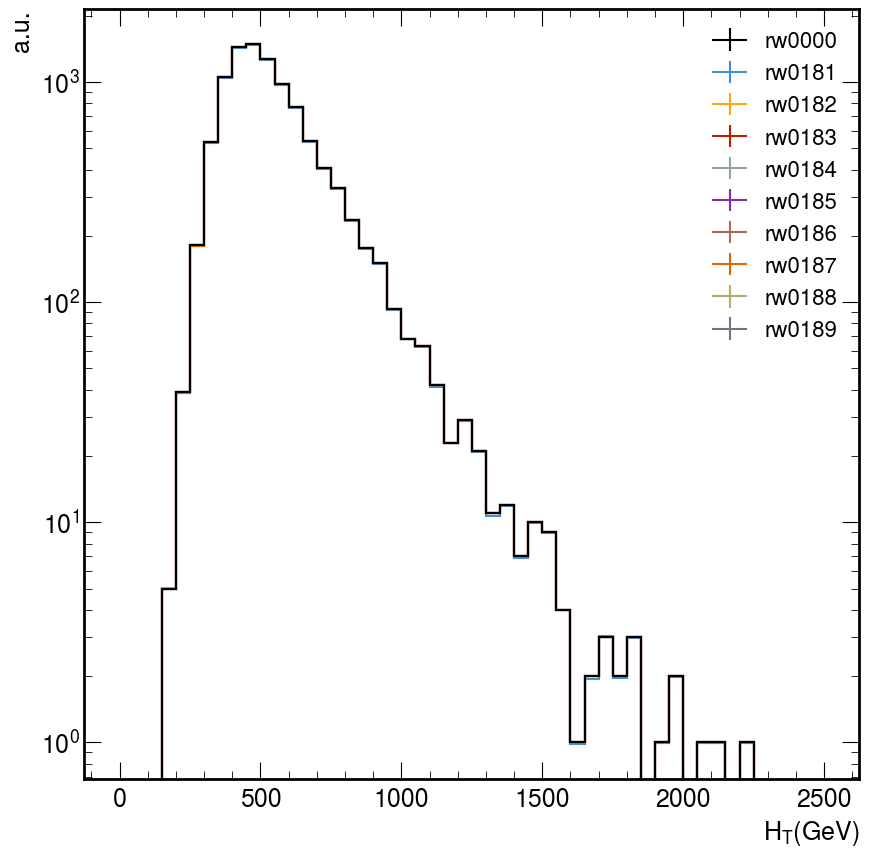

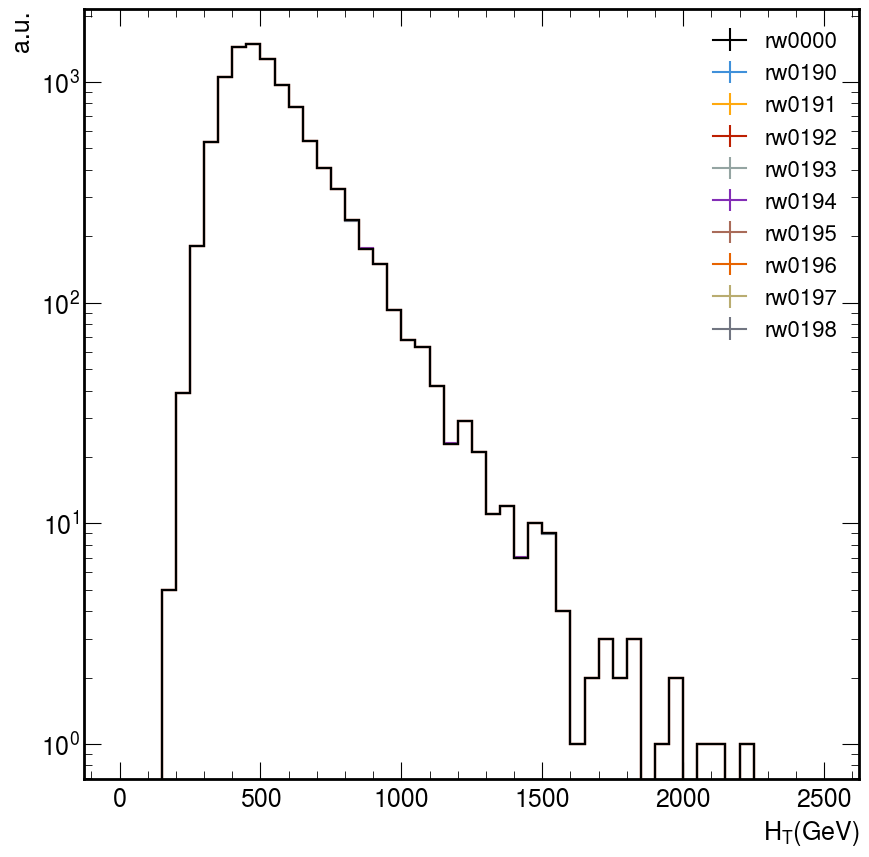

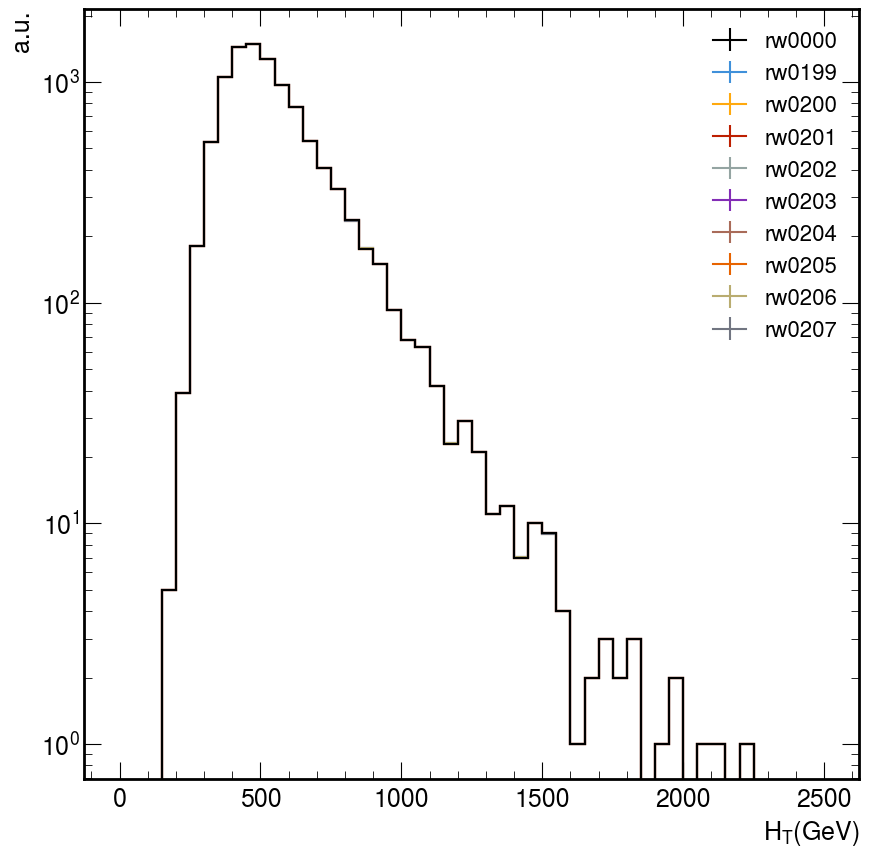

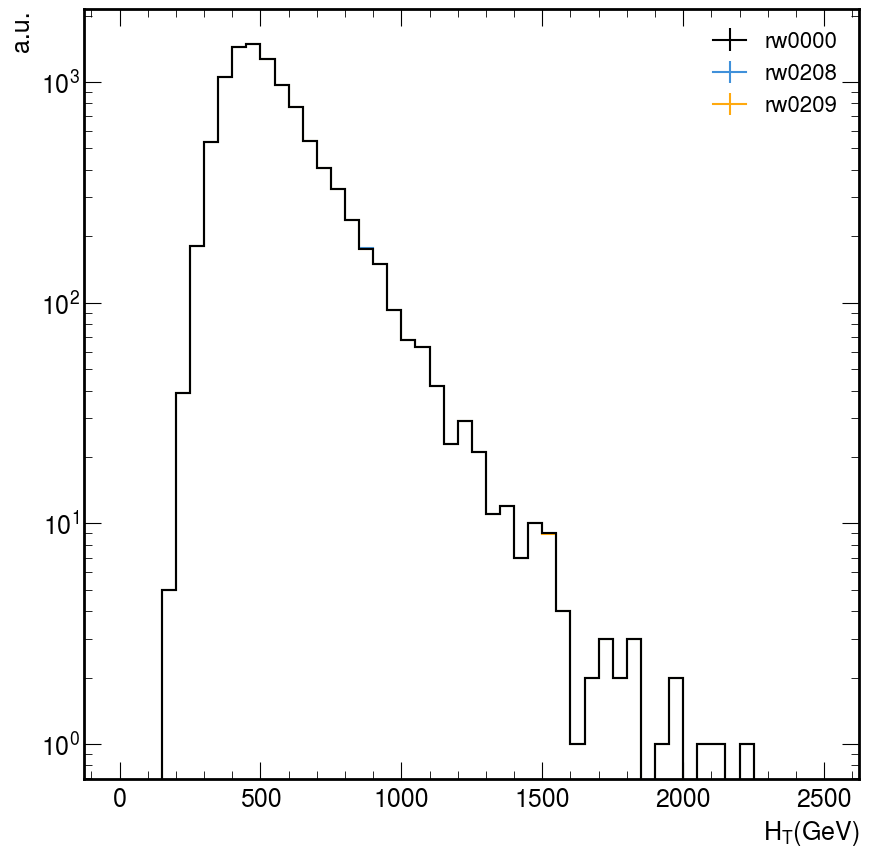

In [6]:
ht_axis = hist.axis.Regular(50, 0, 2500, name="ht_ax", label="ht", underflow=True, overflow=True)

for i in chunks:
    fig, ax = plt.subplots()
    h = hist.Hist(ht_axis, storage=hist.storage.Weight())
    h.fill(ak.sum(events.GenJet.pt, axis=1), weight=getattr(events.LHEWeight, "rw0000"))
    h.plot1d(ax=ax, yerr=0, label="rw0000", color="k", zorder=3)
    for j in i:
        h = hist.Hist(ht_axis, storage=hist.storage.Weight())
        h.fill(ak.sum(events.GenJet.pt, axis=1), weight=getattr(events.LHEWeight, j))
        h.plot1d(ax=ax, yerr=0, label=j)
    
    ax.set_ylabel(r'a.u.')
    ax.set_xlabel(r'$H_{T} (GeV)$')
    ax.set_yscale('log')
    ax.legend()
    plt.show()